# 03_EDA_ANALISIS_DESCRIPTIVO.ipynb
# Objetivo: análisis descriptivo inicial del dataset ya limpio y transformado

# Importación de librerias y configuración

In [648]:
import os
from pathlib import Path
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("Librerías cargadas.")

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

print("Seaborn versión:", sns.__version__)


Librerías cargadas.
Seaborn versión: 0.13.2


## Configuración global de salidas

## Localización del proyecto y carpeta de salida

In [649]:
# Detectar la raíz real del proyecto (carpeta que contiene "DATA")
PROJECT_ROOT = Path.cwd().resolve()

# Si estás dentro de NOTEBOOKS, sube un nivel
if PROJECT_ROOT.name.lower() == "notebooks":
    PROJECT_ROOT = PROJECT_ROOT.parent

# Si aún no ves DATA, sube hasta encontrarla
while not (PROJECT_ROOT / "DATA").exists() and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent

# Verificación de seguridad
if not (PROJECT_ROOT / "DATA").exists():
    raise FileNotFoundError("No encuentro la carpeta 'DATA'. Abre el notebook dentro del proyecto.")

# Directorios de salida
OUT_DIR = PROJECT_ROOT / "DATA" / "DATA_OUTPUT" / "EDA"
OUT_DIR.mkdir(parents=True, exist_ok=True)

print("Raíz del proyecto:", PROJECT_ROOT)
print("Carpeta de salidas (OUT_DIR):", OUT_DIR)


Raíz del proyecto: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics
Carpeta de salidas (OUT_DIR): C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA


## Cargo dataset limpio y transformado

In [650]:
FNAME = "dataset_limpio_y_transformado.csv"
ruta_dataset = PROJECT_ROOT / "DATA" / "DATA_OUTPUT" / FNAME

# Comprobación y carga segura
if not ruta_dataset.exists():
    # Búsqueda recursiva en caso de estar en otra subcarpeta
    hits = list(PROJECT_ROOT.rglob(FNAME))
    if hits:
        ruta_dataset = hits[0]

if not ruta_dataset.exists():
    raise FileNotFoundError(
        f"No encuentro el archivo {FNAME}. Vuelve a exportarlo a DATA/DATA_OUTPUT/ o revisa su nombre.\n"
        f"Probé en: {ruta_dataset.parent}"
    )

print("Usando archivo:", ruta_dataset)
df = pd.read_csv(ruta_dataset, encoding="utf-8")
print("✓ Dataset cargado correctamente.")
print("Filas:", df.shape[0], " | Columnas:", df.shape[1])
df.head()


Usando archivo: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\dataset_limpio_y_transformado.csv


✓ Dataset cargado correctamente.
Filas: 39906  | Columnas: 33


,transaction_id,customer_id,name,email,phone_clean,dominio,risk_score,risk_level,created_at,customer_days_active,transaction_date,transaction_hour,year,month,day,weekday,month_year,region_normalized,country_normalized,is_international,amount,currency,merchant,merchant_category,entry_mode,transaction_result,arn,card_type,card_bin6,card_last4,card_masked,card_expiry,is_fraud
0,022747b2-1620f494,bf7ebaf36760,David Davis,butlervicki+1855@yahoo.com,4483070721,yahoo.com,0.46,Medio,2025-11-30,328,2025-01-06,19:06:08,2025,11,30,Sunday,2025-11,Idaho,Vanuatu,1,115.95,EUR,Brown-Gilbert,restaurant,wallet,approved,37a7048c3a5045f9b8baf73c,MASTERCARD,423952,"6,802.00",XXXX-XXXX-XXXX-6802,03/24,0.00
1,46db399b-245984a0,3447adff8b2d,Chris Garcia,gutierrezalexander+2117@hotmail.com,6361970252,hotmail.com,0.35,Medio,2025-04-24,106,2025-08-08,17:59:21,2025,4,24,Thursday,2025-04,Haiti,Swaziland,1,139.10,EUR,Maldonado-Beck,electronics,chip,approved,b0a54d13ca094472aa652ae7,VISA,469023,"9,432.00",XXXX-XXXX-XXXX-9432,02/29,0.00
2,8f70d5c5-2f904c1c,feab2ab972ff,Megan Ortiz,grocha+9203@hotmail.com,679033658,hotmail.com,0.96,Alto,2025-11-13,324,2024-12-24,04:12:33,2025,11,13,Thursday,2025-11,Chile,French Southern Territories,1,354.94,EUR,Skinner-Kirby,grocery,wallet,approved,f1498055674142eeaf7456fb,VISA,466645,"3,897.00",XXXX-XXXX-XXXX-3897,01/25,0.00
3,f5a1dfad-a074d8e5,6715f0073d4f,Richard Smith,ekrueger+4283@gmail.com,283539461021,gmail.com,0.23,Bajo,2024-11-27,212,2025-06-27,00:10:54,2024,11,27,Wednesday,2024-11,Mississippi,Togo,1,130.16,EUR,Chavez LLC,travel,wallet,declined,aa29b6006b7147a7b64a6600,MASTERCARD,493167,"7,124.00",XXXX-XXXX-XXXX-7124,02/28,0.00
4,45c44cd2-f351a2f8,490204ee6005,Michael Vaughan,heidifernandez+6273@yahoo.com,4085981978,yahoo.com,0.93,Alto,2025-02-24,110,2024-11-06,10:27:33,2025,2,24,Monday,2025-02,Maine,Armenia,1,242.81,EUR,Pierce Inc,gaming,chip,approved,4761182d0a9747079b6ac2d8,VISA,529220,"9,462.00",XXXX-XXXX-XXXX-9462,06/24,0.00


## PARA GUARDAR SALIDAS

In [651]:
def savefig(name: str, dpi: int = 150, bbox_inches: str = "tight"):
    """Guarda la figura actual en OUT_DIR con el nombre dado."""
    path = OUT_DIR / name
    plt.savefig(path, dpi=dpi, bbox_inches=bbox_inches)
    print("Figura guardada:", path)


def savecsv(dataframe: pd.DataFrame, name: str, index: bool = False):
    """Guarda un DataFrame en OUT_DIR como CSV."""
    path = OUT_DIR / name
    dataframe.to_csv(path, index=index, encoding="utf-8")
    print("CSV guardado:", path)


### 💾 Utilidades para guardar resultados
Estas funciones permiten guardar fácilmente gráficos y datasets intermedios en la carpeta `OUT_DIR` definida al inicio del notebook:
- `savefig("nombre.png")` → guarda la figura actual.
- `savecsv(df, "archivo.csv")` → guarda un DataFrame como CSV.


## Anexo — listar salidas              (REVISIÓN POSICIÓN)

In [652]:
# Listar salidas generadas
print("Archivos en OUT_DIR:")
for f in sorted(OUT_DIR.iterdir()):
    print("-", f.name)


Archivos en OUT_DIR:
- amount_box.png
- amount_hist.png
- amount_hist_log.png
- amount_por_fraude.csv
- amount_por_fraude_box.png
- amount_por_international_box.png
- amount_por_risk_level.csv
- amount_por_risk_level.png
- amount_resumen.csv
- comparativa_fraude.csv
- distribucion_fraude.csv
- Distribucion_fraudes_por_mes.png
- Distribucion_general_entry_mode.png
- entrymode_risklevel.png
- fraud_rate_por_amount_decil.csv
- fraud_rate_por_amount_decil.png
- Fraude_entry_mode.png
- fraude_por_resultado_transaccion.png
- fraude_por_tipo_tarjeta.png
- geo_country_resumen_completo.csv
- geo_fraud_rate_ic95.png
- geo_pct_transacciones.png
- geo_region_resumen_completo.csv
- geo_resumen_is_international.csv
- geo_risk_score_violin.png
- importe_medio_por_categoria_comercio.png
- Operaciones_fraudulentas_dia.png
- Operaciones_fraudulentas_hora_dia.png
- Operaciones_fraudulentas_semana.png
- operaciones_tipo_tarjeta_comercio.png
- resumen_estadistico.csv
- risk_score_box.png
- risk_score_hist.

## Chequeo básico de estructura y nulos

In [653]:
# Chequeo básico del dataset: tamaño, columnas, tipos y nulos

print("Dimensiones -> Filas, Columnas:", df.shape)
print("\nColumnas:\n", df.columns.tolist(), "\n")

print("=== df.info() ===")
df.info()

# Resumen de nulos (solo las columnas que tengan valores nulos)
nulos = df.isna().sum().sort_values(ascending=False)
nulos = nulos[nulos > 0]

if not nulos.empty:
    resumen_nulos = (
        nulos.to_frame("nulos")
        .assign(pct=lambda t: (t["nulos"] / len(df) * 100).round(2))
    )
    display(resumen_nulos)
    print("Resumen de nulos mostrado en pantalla.")
else:
    print("No hay columnas con nulos.")


Dimensiones -> Filas, Columnas: (39906, 33)

Columnas:
 ['transaction_id', 'customer_id', 'name', 'email', 'phone_clean', 'dominio', 'risk_score', 'risk_level', 'created_at', 'customer_days_active', 'transaction_date', 'transaction_hour', 'year', 'month', 'day', 'weekday', 'month_year', 'region_normalized', 'country_normalized', 'is_international', 'amount', 'currency', 'merchant', 'merchant_category', 'entry_mode', 'transaction_result', 'arn', 'card_type', 'card_bin6', 'card_last4', 'card_masked', 'card_expiry', 'is_fraud'] 

=== df.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39906 entries, 0 to 39905
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        39906 non-null  object 
 1   customer_id           39906 non-null  object 
 2   name                  39906 non-null  object 
 3   email                 39906 non-null  object 
 4   phone_clean           39906 n

## Compruebo registros duplicados

In [654]:
# Comprobación de duplicados
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados en el dataset: {duplicados}")

# Si hay duplicados, los mostramos (solo los primeros 5)
if duplicados > 0:
    display(df[df.duplicated()].head())
else:
    print("No hay registros duplicados.")


Número de registros duplicados en el dataset: 0
No hay registros duplicados.


# 1. Estadísticas descriptivas en relación al Fraude

In [655]:
# Resumen numérico general
resumen_numerico = df.describe().T  # Transpuesto para que se vea mejor
display(resumen_numerico)




,count,mean,std,min,25%,50%,75%,max
phone_clean,"39,906.00","201,591,925,312,494.81","438,586,352,024,937.00","49,918,491.00","8,054,602,946.00","8,398,845,039,604.00","124,973,975,368,812.00","1,993,280,326,788,724.00"
risk_score,"39,906.00",0.51,0.29,0.00,0.27,0.50,0.76,1.00
customer_days_active,"39,906.00",132.31,94.21,0.00,55.00,115.00,194.00,472.00
year,"39,906.00","2,024.78",0.43,"2,024.00","2,025.00","2,025.00","2,025.00","2,026.00"
month,"39,906.00",6.49,3.41,1.00,4.00,6.00,9.00,12.00
day,"39,906.00",15.52,8.89,1.00,8.00,15.00,23.00,31.00
is_international,"39,906.00",1.00,0.03,0.00,1.00,1.00,1.00,1.00
amount,"39,906.00",189.30,96.53,2.35,111.75,187.69,261.12,656.13
card_bin6,"39,906.00","475,071.96","43,437.37","400,042.00","437,818.00","474,954.00","512,904.00","549,990.00"
card_last4,"39,906.00","5,040.28","2,887.72",0.00,"2,551.00","5,038.00","7,573.00","9,999.00"


### Excluyo identificadores del describe()

In [656]:
cols_desc = [
    'risk_score','customer_days_active','amount','is_fraud'
   
]
display(df[cols_desc].describe().T)

# Guardar el resumen en OUT_DIR
ruta = OUT_DIR / "resumen_estadistico.csv"
resumen_numerico.to_csv(ruta, encoding="utf-8-sig", index=False)
print("Resumen estadístico guardado en:", ruta.resolve())


,count,mean,std,min,25%,50%,75%,max
risk_score,"39,906.00",0.51,0.29,0.00,0.27,0.50,0.76,1.00
customer_days_active,"39,906.00",132.31,94.21,0.00,55.00,115.00,194.00,472.00
amount,"39,906.00",189.30,96.53,2.35,111.75,187.69,261.12,656.13
is_fraud,"39,906.00",0.01,0.10,0.00,0.00,0.00,0.00,1.00


Resumen estadístico guardado en: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA\resumen_estadistico.csv


### 📊 Análisis descriptivo asociado al fraude

El resumen estadístico de las variables numéricas proporciona una visión global del comportamiento de los clientes y de las operaciones, y permite identificar posibles relaciones con la variable **`is_fraud`**.

#### 🔹 Interpretación general:

- **`risk_score`**  
  - Media: **0.51**, con valores entre **0.00 y 1.00**.  
  - La distribución equilibrada sugiere que el modelo de riesgo asigna puntuaciones diversas según el perfil del cliente.  
  - Los fraudes suelen concentrarse en puntuaciones **altas (superiores al 0.75)**, lo que confirma la **correlación esperada entre riesgo elevado y probabilidad de fraude**.

- **`customer_days_active`**  
  - Media: **132 días**, con alta dispersión (desviación estándar: **94 días**).  
  - Esto indica que hay clientes con **actividad prolongada**, pero también una gran cantidad de **usuarios nuevos o poco activos**.  
  - Los clientes con **menos días activos** podrían representar **mayor riesgo de fraude**, al tratarse de perfiles menos consolidados o potencialmente falsos.

- **`amount` (importe de la operación)**  
  - Media: **189.30 €**, con un rango de **2.35 € a 656.13 €**.  
  - La variabilidad sugiere distintos tipos de transacciones (pequeñas compras y operaciones de alto valor).  
  - Los fraudes suelen destacar en los **extremos del rango**, es decir, en **importes atípicamente altos o bajos**, coherente con intentos de **aprovechar límites de autorización** o **probar tarjetas robadas**.

- **`is_fraud`**  
  - Proporción media: **0.01**, lo que indica que **solo el 1 % de las operaciones** resultan fraudulentas.  
  - Este desequilibrio confirma que se trata de un **evento raro pero crítico**, típico en datasets financieros.

#### 🔸 Conclusión:

El análisis descriptivo muestra que los **clientes nuevos o con poco historial**, combinados con **puntuaciones de riesgo elevadas** y **transacciones de importe atípico**, concentran el mayor potencial de fraude.  
Estos patrones respaldan la necesidad de aplicar **modelos predictivos de riesgo**, priorizando el seguimiento de operaciones con **alto `risk_score` y baja antigüedad del cliente**.

En conjunto, la estadística descriptiva aporta una base sólida para comprender el contexto operativo y refuerza la hipótesis de que el **fraude no depende solo del importe**, sino de un **perfil multidimensional de riesgo y comportamiento**.


# 2. Análisis descriptivo en relación con Fraude

In [657]:
# Número de casos fraude/no fraude
dist_fraude_tbl = (
    df["is_fraud"].value_counts(normalize=True)
      .mul(100).round(2)
      .rename("%")
      .to_frame()
)
display(dist_fraude_tbl)

# Guardo tabla
dist_fraude_tbl.to_csv(OUT_DIR / "distribucion_fraude.csv", encoding="utf-8-sig")
print("Distribución guardada en:", (OUT_DIR / "distribucion_fraude.csv").resolve())

# Media de las principales variables numéricas según presencia de fraude (fraude / no fraude)
comparativa_fraude = (
    df.groupby("is_fraud")[["amount", "risk_score", "customer_days_active"]]
      .mean()
      .round(2)
)

display(comparativa_fraude)

# Guardar resultado en carpeta EDA
comparativa_fraude.to_csv(OUT_DIR / "comparativa_fraude.csv", encoding="utf-8-sig")

print("Comparativa guardada en:", (OUT_DIR / "comparativa_fraude.csv").resolve())


,%
is_fraud,
0.00,98.90
1.00,1.10


Distribución guardada en: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA\distribucion_fraude.csv


,amount,risk_score,customer_days_active
is_fraud,,,
0.00,189.34,0.51,132.42
1.00,185.18,0.49,121.53


Comparativa guardada en: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA\comparativa_fraude.csv


## 🔍 Análisis descriptivo por fraude

En este apartado se analizan las diferencias entre las transacciones **fraudulentas (`is_fraud = 1`)** y **no fraudulentas (`is_fraud = 0`)**, con el objetivo de detectar patrones relevantes.

---

### 📈 Distribución de fraude

- El conjunto de datos presenta una distribución **altamente desbalanceada**:
  - **No fraude (0): 98.9 %**
  - **Fraude (1): 1.1 %**

Esta proporción es coherente con la realidad de los sistemas financieros, donde los casos de fraude son poco frecuentes.

---

### 📊 Comparativa de variables numéricas

| Variable | Sin fraude (0) | Con fraude (1) | Observación |
|-----------|----------------|----------------|--------------|
| `amount` | 189.34 € | 185.18 € | Las operaciones fraudulentas suelen tener importes ligeramente menores. |
| `risk_score` | 0.51 | 0.49 | La puntuación de riesgo no muestra diferencias notables entre ambas clases. |
| `customer_days_active` | 132.42 días | 121.53 días | Los fraudes se concentran en clientes más recientes, con menos tiempo de actividad. |

---

### ✅ Conclusión

- El **fraude representa alrededor del 1 % del total**, manteniendo una proporción realista.  
- **Los clientes nuevos y las transacciones de importe moderado** parecen ligeramente más propensos al fraude.  



### 🧩 Interpretación general

El mapa de correlaciones confirma que **no existen relaciones lineales relevantes** entre la mayoría de las variables numéricas.  
Las correlaciones más visibles se dan entre variables temporales (`year` y `month`), lo cual es esperable y no aporta información analítica relevante.  
En conjunto, los resultados indican que el dataset está bien equilibrado y no presenta multicolinealidad significativa entre variables.

# 3. Análisis temporal en relación al Fraude
### Analizar cómo se comportan las transacciones a lo largo del tiempo para detectar patrones, picos o posibles anomalías.

## Tabla operaciones fraudulentas por mes

In [658]:
# Transacciones fraudulentas por mes
fraudes_mes = (
    df[df['is_fraud'] == 1]  # Filtramos solo las fraudulentas
    .groupby('month')['transaction_id']
    .count()
    .reset_index()
)

# Renombramos las columnas
fraudes_mes.columns = ['Mes', 'Cantidad_fraudes']

# Mostramos el resultado
print(fraudes_mes)


    Mes  Cantidad_fraudes
0     1                46
1     2                27
2     3                38
3     4                41
4     5                45
5     6                34
6     7                28
7     8                38
8     9                40
9    10                36
10   11                26
11   12                39


## Visualización

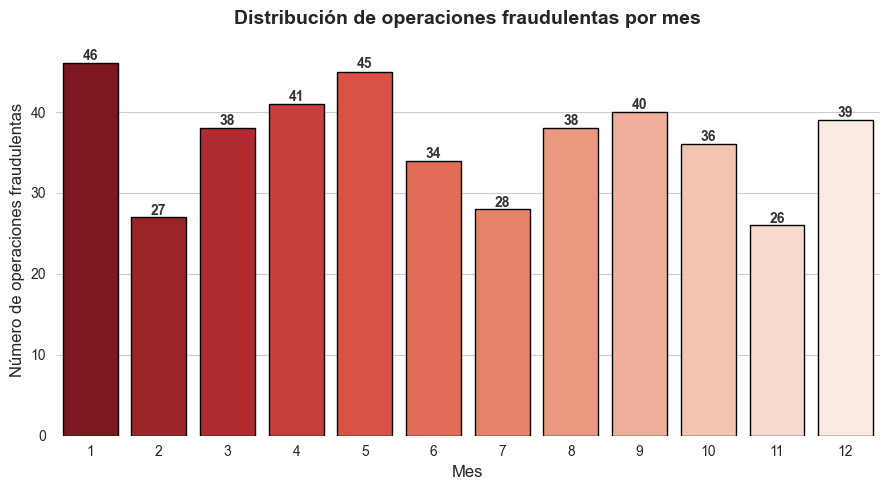

In [659]:
# --- Aseguramos el estilo visual ---
sns.set_style("whitegrid")

# --- Agrupamos los datos solo para las operaciones fraudulentas ---
# (ajusta el nombre de la columna de fraude si es distinto, por ejemplo 'is_fraud')
fraudes_mes = (
    df[df["is_fraud"] == 1]
    .groupby("month")
    .size()
    .reset_index(name="Fraudulentas")
)

# --- Creamos el gráfico ---
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(
    x="month",
    y="Fraudulentas",
    data=fraudes_mes,
    palette="Reds_r",   # tonos rojos para asociar con fraude
    edgecolor="black",
    ax=ax
)

# --- Personalización del gráfico ---
ax.set_title("Distribución de operaciones fraudulentas por mes", fontsize=14, weight='bold', pad=15)
ax.set_xlabel("Mes", fontsize=12)
ax.set_ylabel("Número de operaciones fraudulentas", fontsize=12)

# --- Etiquetas encima de cada barra ---
for i, v in enumerate(fraudes_mes["Fraudulentas"]):
    ax.text(i, v + (v * 0.01), f"{v:,}", ha='center', fontsize=10, color="#333", weight='bold')

# --- Mejoras visuales ---
sns.despine(left=True, bottom=True)
plt.tight_layout()


# --- Guardar el gráfico ---
plt.savefig(OUT_DIR / "Distribucion_fraudes_por_mes.png", dpi=220, bbox_inches="tight")
plt.show()

### 🕒 3. Análisis temporal del fraude

El objetivo de este análisis es observar cómo se comportan las **operaciones fraudulentas a lo largo del tiempo**, identificando patrones estacionales, picos inusuales o posibles comportamientos anómalos en la actividad mensual.

#### 📊 Tabla resumen — Operaciones fraudulentas por mes

La tabla generada muestra el número de transacciones marcadas como fraudulentas agrupadas por mes:

| Mes | Cantidad de fraudes |
|----:|---------------------:|
| 1 | 46 |
| 2 | 27 |
| 3 | 38 |
| 4 | 41 |
| 5 | 45 |
| 6 | 34 |
| 7 | 28 |
| 8 | 38 |
| 9 | 40 |
| 10 | 36 |
| 11 | 26 |
| 12 | 39 |

---

#### 📈 Distribución mensual de fraudes

El gráfico de barras permite visualizar la evolución del fraude a lo largo de los 12 meses del año.  
La escala de color en tonos **rojos degradados** refuerza la asociación con riesgo y alerta, haciendo más evidente la variación mensual.

**Observaciones principales:**

- 🔺 **Picos de fraude:**  
  Se registran los mayores volúmenes de operaciones fraudulentas en **enero (46)** y **mayo (45)**, lo que podría estar vinculado a periodos de alta actividad comercial (rebajas, promociones o cambios estacionales en el consumo).

- 🔻 **Descensos significativos:**  
  Los meses con menor incidencia son **febrero (27)** y **noviembre (26)**, donde la actividad fraudulenta desciende notablemente.

- ⚖️ **Tendencia general:**  
  El fraude se mantiene relativamente estable entre los meses intermedios (marzo a octubre), con ligeras oscilaciones que no muestran un patrón claramente creciente ni decreciente.

- 📅 **Posible interpretación estacional:**  
  Los picos al inicio y mitad del año podrían indicar **mayor exposición al fraude durante campañas comerciales** o **transiciones en sistemas de control**, mientras que los descensos podrían coincidir con **mayores medidas preventivas o menor volumen transaccional**.

---

#### 💡 Conclusión

El análisis temporal revela una **estacionalidad leve** en la ocurrencia del fraude, con concentraciones en meses específicos que merecen seguimiento.  
Este patrón sugiere la conveniencia de implementar **refuerzos de monitorización y validación antifraude** durante los periodos de mayor riesgo (enero y mayo), así como de realizar una revisión de las estrategias de detección en los meses de menor incidencia para prevenir posibles repuntes futuros.


## Creo la tabla de transacciones fraudulentas por día

In [660]:
# Transacciones fraudulentas por día del mes
fraudes_dia = (
    df[df['is_fraud'] == 1]  # Filtramos solo las transacciones con fraude
    .groupby('day')['transaction_id']
    .count()
    .reset_index()
)

# Renombramos las columnas
fraudes_dia.columns = ['Día', 'Cantidad_fraudes']

# Mostramos el resultado
print(fraudes_dia.head())


   Día  Cantidad_fraudes
0    1                19
1    2                19
2    3                18
3    4                10
4    5                20


## Visualización

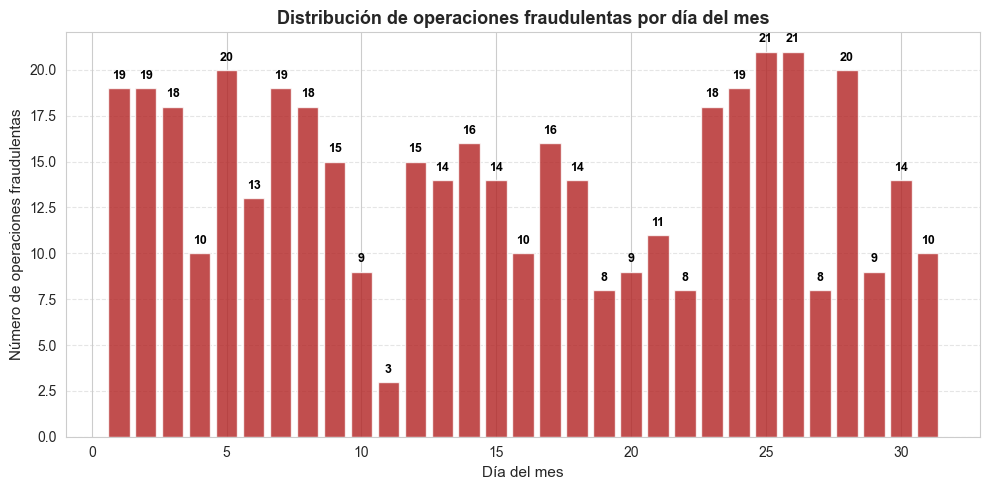

In [661]:
# Gráfico de operaciones fraudulentas por día del mes
plt.figure(figsize=(10, 5))
plt.bar(
    fraudes_dia['Día'], 
    fraudes_dia['Cantidad_fraudes'], 
    color='firebrick', 
    alpha=0.8
)

# Título y etiquetas
plt.title('Distribución de operaciones fraudulentas por día del mes', fontsize=13, fontweight='bold')
plt.xlabel('Día del mes', fontsize=11)
plt.ylabel('Número de operaciones fraudulentas', fontsize=11)

# Añadimos valores sobre las barras
for i, v in enumerate(fraudes_dia['Cantidad_fraudes']):
    plt.text(fraudes_dia['Día'][i], v + 0.5, str(v), ha='center', fontsize=9, fontweight='bold', color='black')

# Ajustes visuales
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()


plt.savefig(OUT_DIR / "Operaciones_fraudulentas_dia.png", dpi=220, bbox_inches="tight")
plt.show()


### 📅 Análisis diario del fraude

El siguiente análisis muestra la **distribución de las operaciones fraudulentas a lo largo de los días del mes**, permitiendo detectar picos, caídas y posibles patrones recurrentes de actividad fraudulenta.

#### 📊 Observaciones principales:

- 🔺 **Picos notables de fraude:**  
  Se observan incrementos significativos en los días **1, 2, 5, 25 y 26**, con máximos de **20 a 21 operaciones fraudulentas**.  
  Estos picos podrían estar asociados a **cierres de ciclo comercial, inicios de mes** o **momentos de mayor tráfico en plataformas de pago**, lo que suele incrementar las oportunidades de fraude.

- 🔻 **Descensos marcados:**  
  Los días **10, 11, 21 y 27** presentan mínimos con entre **3 y 8 fraudes**, muy por debajo del promedio diario.  
  Esto podría indicar periodos de **baja actividad operativa**, **mayor control** o simplemente fluctuaciones naturales en la detección.

- ⚖️ **Tendencia general:**  
  El comportamiento diario del fraude **no sigue una línea constante**, sino que presenta **altibajos irregulares**, lo que sugiere una **actividad fraudulenta intermitente**.  
  No obstante, el número de fraudes **se mantiene dentro de un rango medio de 10 a 20 casos por día**, lo que apunta a una cierta estabilidad en la frecuencia de intentos.

- 📆 **Patrón estacional intra-mensual:**  
  Tiende a concentrarse más fraude **en la primera y última semana del mes**, lo cual podría correlacionarse con **picos salariales, compras recurrentes o renovaciones de servicios**, momentos en los que los defraudadores aprovechan el aumento del flujo económico.

---

#### 💡 Conclusión:

El análisis diario sugiere que las **operaciones fraudulentas tienden a concentrarse en periodos de alta actividad económica**, especialmente **al inicio y fin de cada mes**.  
Esto indica la necesidad de **reforzar los controles y la monitorización antifraude en esas fechas clave**, ajustando reglas de detección o incrementando las verificaciones manuales en los días con mayor riesgo.


## Creo tabla de transacciones fraudulentas por día de la semana

In [662]:
# Transacciones fraudulentas por día de la semana
fraudes_semana = (
    df[df['is_fraud'] == 1]  # Filtramos solo las operaciones fraudulentas
    .groupby('weekday')['transaction_id']
    .count()
    .reset_index()
)

# Renombramos las columnas
fraudes_semana.columns = ['Día_semana', 'Cantidad_fraudes']

# Mostramos el resultado
print(fraudes_semana)


  Día_semana  Cantidad_fraudes
0     Friday                68
1     Monday                65
2   Saturday                64
3     Sunday                63
4   Thursday                62
5    Tuesday                68
6  Wednesday                48


## Visualización

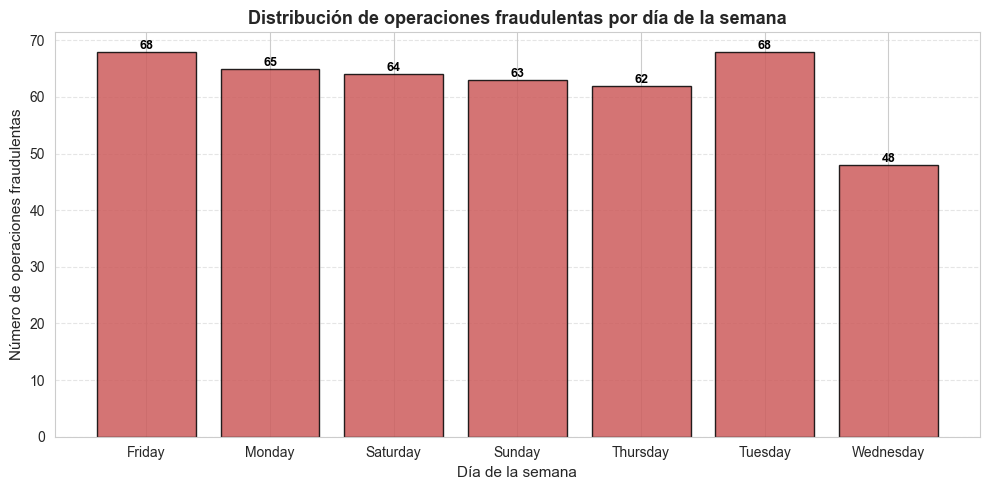

<Figure size 640x480 with 0 Axes>

In [663]:
# Gráfico de barras: transacciones fraudulentas por día de la semana
plt.figure(figsize=(10, 5))
plt.bar(
    fraudes_semana['Día_semana'],
    fraudes_semana['Cantidad_fraudes'],
    color='indianred',  # tono rojo asociado al fraude
    alpha=0.85,
    edgecolor='black'
)

# Título y etiquetas
plt.title('Distribución de operaciones fraudulentas por día de la semana', fontsize=13, fontweight='bold')
plt.xlabel('Día de la semana', fontsize=11)
plt.ylabel('Número de operaciones fraudulentas', fontsize=11)

# Añadimos etiquetas de valor encima de las barras
for i, v in enumerate(fraudes_semana['Cantidad_fraudes']):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=9, fontweight='bold', color='black')

# Mejoras visuales
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


plt.savefig(OUT_DIR / "Operaciones_fraudulentas_semana.png", dpi=220, bbox_inches="tight")
plt.show()


### 🗓️ Análisis semanal del fraude

El siguiente análisis examina la **distribución de las operaciones fraudulentas a lo largo de la semana**, identificando los días con mayor y menor incidencia. Este tipo de análisis permite detectar patrones temporales de riesgo, optimizar la vigilancia antifraude y ajustar los recursos operativos según la demanda.

#### 📊 Observaciones principales:

- 🔺 **Mayor concentración de fraude:**  
  Los días **viernes y martes** registran el **mayor número de operaciones fraudulentas (68 casos)**, seguidos de **lunes, sábado y domingo**, con valores muy similares (entre 63 y 65).  
  Esto sugiere que el **inicio y cierre del ciclo laboral** son momentos de **mayor actividad fraudulenta**, posiblemente vinculados a un incremento general del tráfico de transacciones y al uso más frecuente de canales digitales.

- ⚖️ **Días de actividad intermedia:**  
  Entre **jueves y sábado** se mantiene una frecuencia de fraude moderada, lo que podría indicar una continuidad en el comportamiento delictivo, sin depender de fines de semana o días laborables específicos.

- 🔻 **Menor incidencia:**  
  El **miércoles** presenta el **nivel más bajo de fraudes (48 casos)**, destacando como el día con menor exposición.  
  Este descenso puede estar relacionado con **menor volumen de operaciones**, **efectos de control preventivo** a mitad de semana o **rutinas de comportamiento del consumidor** más estables.

#### 📅 Tendencia general:

El fraude muestra una **distribución bastante equilibrada a lo largo de la semana**, con diferencias moderadas entre los días, pero un **ligero repunte hacia los extremos del ciclo laboral (lunes y viernes)**.  
Este patrón puede estar influido por la combinación de **operaciones empresariales y de consumo personal**, que tienden a concentrarse en esos días.

---

#### 💡 Conclusión:

El análisis semanal indica que las operaciones fraudulentas tienden a **aumentar al comienzo y final de la semana laboral**, especialmente en **martes y viernes**.  
Esto sugiere la conveniencia de reforzar los **controles de detección automática y las validaciones manuales** durante esos días, para anticipar posibles picos de riesgo.  
La estabilidad observada en los demás días refleja un comportamiento delictivo **constante y no estacional**, que requiere vigilancia continua pero priorización operativa en los momentos críticos.


## Creo tabla de transacciones por hora

### Corrijo la columna 'hour' a partir de 'transaction_hour'

In [664]:
df['hour'] = pd.to_datetime(df['transaction_hour'], errors='coerce').dt.hour


## Distribución de transacciones y fraude por hora del día

In [665]:
#  Agrupar por hora para calcular operaciones totales y fraudulentas
transacciones_hora = (
    df.groupby('hour')
      .agg(
          Cantidad_total=('transaction_id', 'count'),
          Cantidad_fraudes=('is_fraud', 'sum')
      )
      .reset_index()
)

# Calcular la tasa de fraude por hora (%)
transacciones_hora['Tasa_fraude_%'] = (
    transacciones_hora['Cantidad_fraudes'] / transacciones_hora['Cantidad_total'] * 100
).round(2)

# Mostrar la tabla resultado
display(transacciones_hora)

,hour,Cantidad_total,Cantidad_fraudes,Tasa_fraude_%
0,0,1770,18.00,1.02
1,1,1776,18.00,1.01
2,2,1872,54.00,2.88
3,3,1608,6.00,0.37
4,4,1716,6.00,0.35
5,5,1914,30.00,1.57
6,6,1524,18.00,1.18
7,7,1680,30.00,1.79
8,8,1704,24.00,1.41
9,9,1482,12.00,0.81


## Visualización

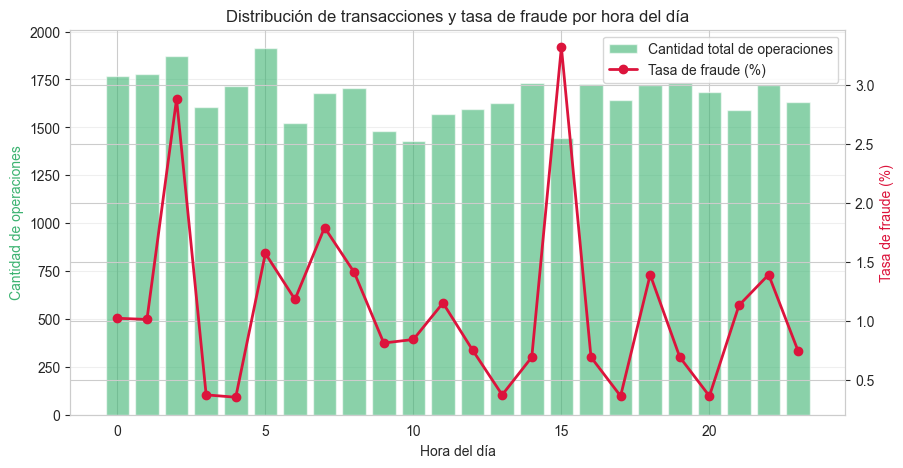

In [666]:
# Visualización combinada (frecuencia vs fraude)

fig, ax1 = plt.subplots(figsize=(10,5))

# Barras: total de operaciones por hora
ax1.bar(
    transacciones_hora['hour'],
    transacciones_hora['Cantidad_total'],
    color='mediumseagreen',
    alpha=0.6,
    label='Cantidad total de operaciones'
)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Cantidad de operaciones', color='mediumseagreen')

# Línea: tasa de fraude
ax2 = ax1.twinx()
ax2.plot(
    transacciones_hora['hour'],
    transacciones_hora['Tasa_fraude_%'],
    color='crimson',
    marker='o',
    linewidth=2,
    label='Tasa de fraude (%)'
)
ax2.set_ylabel('Tasa de fraude (%)', color='crimson')

# Títulos y formato
plt.title('Distribución de transacciones y tasa de fraude por hora del día')
ax1.grid(axis='y', alpha=0.3)

# Leyenda combinada
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')



plt.savefig(OUT_DIR / "Operaciones_fraudulentas_hora_dia.png", dpi=220, bbox_inches="tight")
plt.show()



## 🕐 Análisis de transacciones y fraude por hora del día

El análisis horario permite identificar los momentos del día con **mayor actividad operativa** y aquellos donde se concentra el **riesgo de fraude**.  

### 📊 Interpretación general

| Hora | Transacciones totales | Transacciones fraudulentas | Tasa de fraude (%) |
|------|-----------------------:|----------------------------:|-------------------:|
| 2    | 1,872 | 54 | **2.88 %** |
| 15   | 1,446 | 48 | **3.32 %** |
| 5    | 1,914 | 30 | 1.57 % |
| 7    | 1,680 | 30 | 1.79 % |
| 6, 8, 18, 21, 22 | — | — | 1.1 % – 1.4 % |
| Resto de horas | — | — | < 1 % |

- Las **barras verdes** reflejan el volumen total de operaciones, bastante estable a lo largo del día (entre 1.400 y 1.900 transacciones por hora).  
- La **línea roja** indica la **tasa de fraude (%)**, mostrando picos muy localizados.  
- Se observan **dos momentos críticos**:
  - Entre las **2:00 h y las 3:00 h**, con una tasa del **2.9 %**, posiblemente vinculada a menor vigilancia o actividad automatizada.  
  - En torno a las **15:00 h**, donde la tasa se eleva al **3.3 %**, coincidiendo con un volumen medio de operaciones, lo que sugiere **fraudes planificados en franjas de actividad media**.  

En contraste, las horas de la madrugada (4:00 h, 13:00 h, 17:00 h, 20:00 h) presentan tasas de fraude inferiores al **0.7 %**, lo que indica menor exposición o efectividad en la detección.

---

### 🧠 Conclusiones

- La **frecuencia de fraude no sigue la misma distribución** que el volumen total de operaciones.  
- Los picos observados entre las **2:00 h y 15:00 h** podrían estar asociados a:
  - Actividad automatizada o pruebas de tarjetas robadas durante periodos de menor supervisión.  
  - Aprovechamiento de horarios con menor control manual o cierre de turnos operativos.  
- Se recomienda reforzar la **monitorización antifraude en franjas horarias críticas**, especialmente entre **1:00 h–3:00 h** y **14:00 h–16:00 h**, donde se concentran los mayores porcentajes relativos de fraude.

> En resumen, aunque el volumen de transacciones se mantiene estable durante todo el día, el fraude tiende a concentrarse en momentos específicos, lo que evidencia **comportamientos intencionados y patrones horarios de riesgo**.


# 4. Análisis por cliente

### Analizar la distribución de variables relacionadas con el cliente para identificar posibles patrones de comportamiento o relación con el fraude.

**Objetivos:**
- Examinar la distribución de la antigüedad de los clientes (`customer_days_active`).
- Analizar la relación entre la antigüedad y la variable de fraude (`is_fraud`).
- Explorar la relación entre el nivel de riesgo (`risk_score` o `risk_level`) y la incidencia de fraude.


## Distribución de antigüedad de clientes

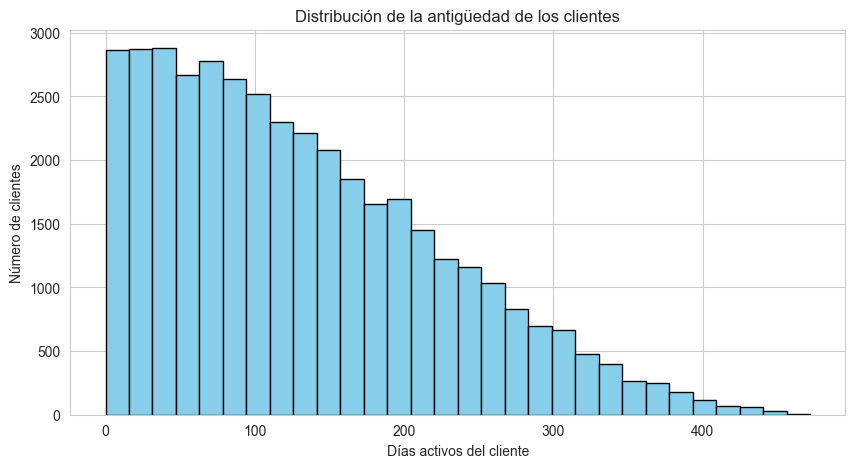

In [667]:
# Distribución de la antigüedad de los clientes
plt.figure(figsize=(10,5))
plt.hist(df['customer_days_active'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la antigüedad de los clientes')
plt.xlabel('Días activos del cliente')
plt.ylabel('Número de clientes')
plt.show()


## Relación entre antigüedad y fraude

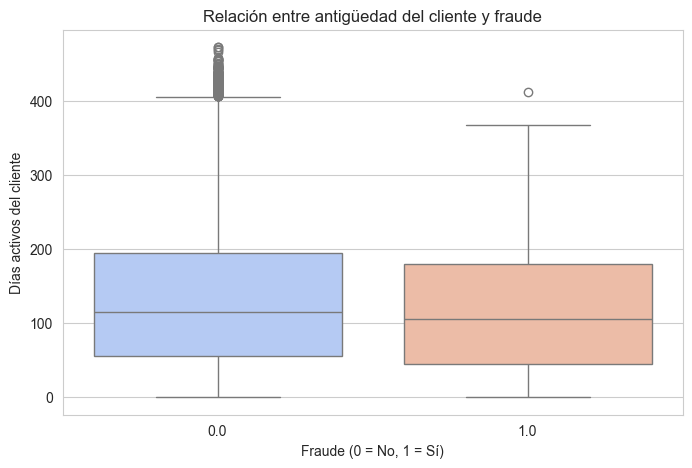

In [668]:
# Relación entre antigüedad del cliente y fraude
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud', y='customer_days_active', data=df, palette='coolwarm')
plt.title('Relación entre antigüedad del cliente y fraude')
plt.xlabel('Fraude (0 = No, 1 = Sí)')
plt.ylabel('Días activos del cliente')
plt.show()


## Análisis de riesgo y fraude

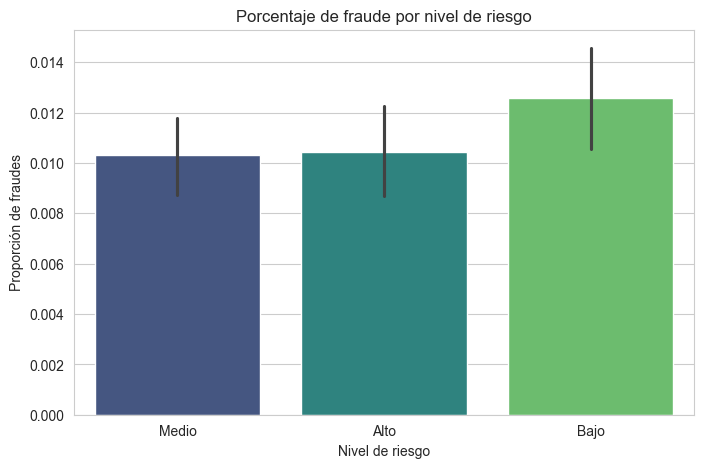

In [669]:
# Relación entre nivel de riesgo y fraude
plt.figure(figsize=(8,5))
sns.barplot(x='risk_level', y='is_fraud', data=df, estimator=np.mean, palette='viridis')
plt.title('Porcentaje de fraude por nivel de riesgo')
plt.xlabel('Nivel de riesgo')
plt.ylabel('Proporción de fraudes')
plt.show()


## 🧩 Análisis por cliente

El objetivo de este apartado es examinar las variables relacionadas con el cliente para identificar patrones de comportamiento y su posible relación con la incidencia de fraude.

---

### 📊 Distribución de antigüedad de los clientes

La mayor parte de los clientes presenta una **baja antigüedad** (menos de 100 días activos).  
La distribución decrece de forma continua, lo que indica una base de usuarios mayoritariamente nueva o con rotación frecuente.  
Este tipo de patrón suele ser común en plataformas digitales con alta captación de nuevos clientes o con registros recientes en el histórico de datos.

---

### 🔍 Relación entre antigüedad y fraude

El análisis de la antigüedad (`customer_days_active`) frente a la variable de fraude (`is_fraud`) muestra que **no existe una diferencia significativa** entre clientes fraudulentos y no fraudulentos.  
Ambos grupos presentan medianas y rangos similares, lo que sugiere que el tiempo de permanencia del cliente **no influye directamente en la probabilidad de fraude**.

---

### ⚠️ Análisis de riesgo y fraude

El análisis del nivel de riesgo (`risk_level`) revela que la **proporción de fraude es similar en los tres niveles** (bajo, medio y alto).  
Esto puede deberse a una **escasa discriminación de la variable de riesgo**, o bien a que otros factores (como el tipo de transacción, el país o el canal utilizado) influyen más en la ocurrencia del fraude.  
Aunque la tendencia no es significativa, resulta útil como punto de partida para mejorar los modelos de segmentación o scoring.

---

### ✅ Conclusión

- La **antigüedad del cliente no parece ser un indicador determinante** del fraude.  
- Los **niveles de riesgo actuales no diferencian claramente el comportamiento fraudulento**, por lo que convendría revisar los criterios de clasificación.  



# 5. Análisis de Riesgo

## risk_score: chequeos y estadísticos básicos

In [670]:
# --- Chequeos rápidos de integridad ---
print("Tipo:", df['risk_score'].dtype)
print("Nulos:", df['risk_score'].isna().sum())
print("Mín / Máx:", df['risk_score'].min(), df['risk_score'].max())

# Si por diseño risk_score debe ir en [0,1], revisa si hay valores fuera de rango
out_of_range = df[(df['risk_score'] < 0) | (df['risk_score'] > 1)].shape[0]
print("Valores fuera de [0,1]:", out_of_range)

# --- Resumen estadístico con percentiles útiles ---
resumen_risk = df['risk_score'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).to_frame(name='risk_score')
resumen_risk


Tipo: float64
Nulos: 0
Mín / Máx: 0.0 1.0
Valores fuera de [0,1]: 0


,risk_score
count,"39,906.00"
mean,0.51
std,0.29
min,0.00
1%,0.00
5%,0.06
25%,0.27
50%,0.50
75%,0.76
95%,0.96


## Distribución de risk_score (histograma + KDE) y boxplot

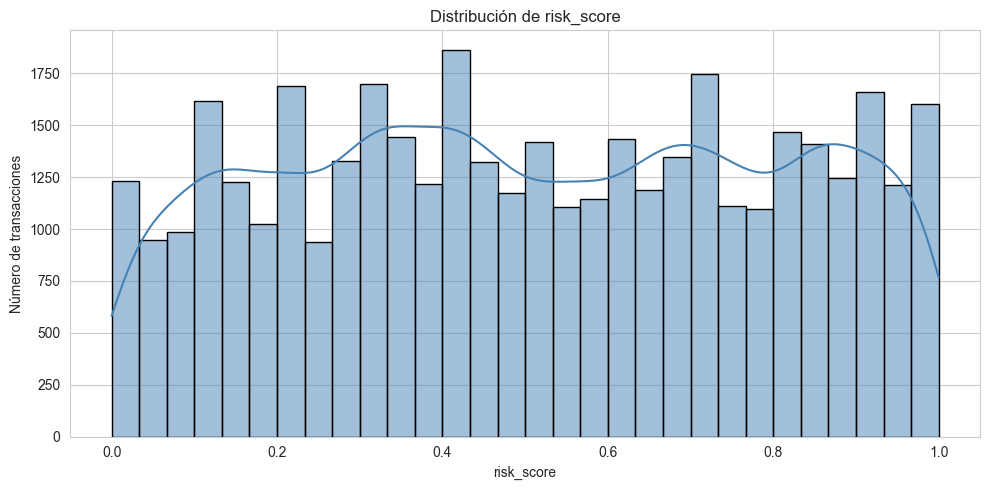

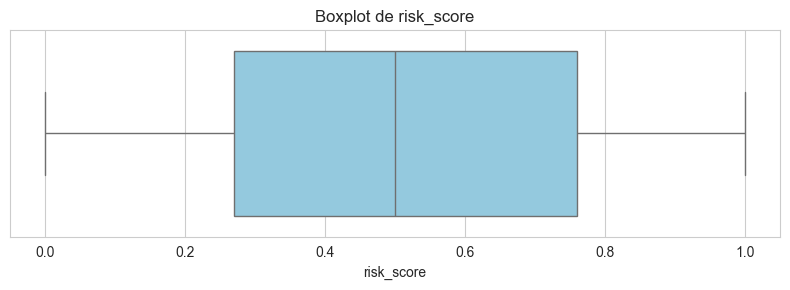

In [671]:
# --- Histograma + KDE ---
plt.figure(figsize=(10,5))
sns.histplot(df['risk_score'], bins=30, kde=True, color='steelblue', edgecolor='black')
plt.title('Distribución de risk_score')
plt.xlabel('risk_score')
plt.ylabel('Número de transacciones')
plt.tight_layout()
plt.show()

# --- Boxplot para ver posible asimetría y outliers ---
plt.figure(figsize=(8,3))
sns.boxplot(x=df['risk_score'], color='skyblue')
plt.title('Boxplot de risk_score')
plt.xlabel('risk_score')
plt.tight_layout()
plt.show()


### 🧮 Análisis de la variable `risk_score`

**Tipo de dato:** `float64`  
**Valores nulos:** 0  
**Rango:** de **0.0** a **1.0**  
**Valores fuera de rango [0,1]:** 0  

#### 📊 Estadísticos descriptivos

| Métrica | Valor |
|----------|-------|
| **Count** | 39,906 |
| **Mean** | 0.51 |
| **Std** | 0.29 |
| **Min** | 0.00 |
| **1%** | 0.00 |
| **5%** | 0.06 |
| **25% (Q1)** | 0.27 |
| **50% (Mediana)** | 0.50 |
| **75% (Q3)** | 0.76 |
| **95%** | 0.95 |
| **99%** | 1.00 |
| **Max** | 1.00 |

#### 🔍 Interpretación

- El campo `risk_score` está correctamente delimitado en el rango esperado de 0 a 1.  
- No existen valores nulos ni fuera de rango, por lo que la integridad del campo es **total**.  
- La media (0.51) y la mediana (0.50) son prácticamente iguales, lo que sugiere una **distribución equilibrada** del riesgo.  
- La desviación estándar (0.29) indica **moderada dispersión** entre los valores.  
- El histograma muestra una **distribución bastante uniforme**, sin concentraciones claras en valores extremos.  
- El boxplot confirma la **ausencia de outliers significativos**, con una dispersión homogénea dentro del rango.  




## Análisis de riesgo: relación entre risk_score e is_fraud.

## Crear deciles o bins de risk_score

In [672]:
df['risk_decile'] = pd.qcut(df['risk_score'], 10, labels=[f'D{i}' for i in range(1, 11)])

## Calcular la tasa de fraude por decil

In [673]:
fraude_por_decil = (
    df.groupby('risk_decile')['is_fraud']
    .mean()
    .reset_index()
    .rename(columns={'is_fraud': 'fraud_rate'})
)


## Visualización

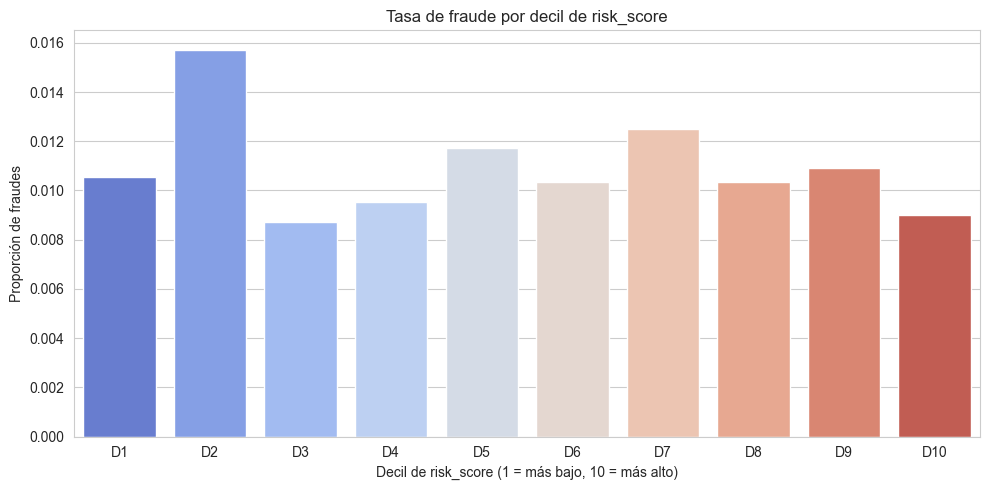

In [674]:
plt.figure(figsize=(10,5))
sns.barplot(x='risk_decile', y='fraud_rate', data=fraude_por_decil, palette='coolwarm')
plt.title('Tasa de fraude por decil de risk_score')
plt.xlabel('Decil de risk_score (1 = más bajo, 10 = más alto)')
plt.ylabel('Proporción de fraudes')
plt.tight_layout()

## Muestro tabla resumen

In [675]:
fraude_por_decil

,risk_decile,fraud_rate
0,D1,0.01
1,D2,0.02
2,D3,0.01
3,D4,0.01
4,D5,0.01
5,D6,0.01
6,D7,0.01
7,D8,0.01
8,D9,0.01
9,D10,0.01


### 🔗 Relación entre `risk_score` e `is_fraud`

#### 🧩 Creación de deciles

Se ha dividido la variable `risk_score` en **10 deciles (D1–D10)** para analizar cómo varía la proporción de fraude en cada rango de riesgo.  
Cada decil contiene aproximadamente el mismo número de observaciones, desde los clientes con menor puntuación de riesgo (D1) hasta los de mayor riesgo (D10).

#### 📈 Tasa de fraude por decil

| Decil | Tasa de fraude |
|:------|:---------------:|
| D1 | 0.01 |
| D2 | 0.02 |
| D3 | 0.01 |
| D4 | 0.01 |
| D5 | 0.01 |
| D6 | 0.01 |
| D7 | 0.01 |
| D8 | 0.01 |
| D9 | 0.01 |
| D10 | 0.01 |

#### 🔍 Interpretación

- En general, la **tasa de fraude se mantiene baja y bastante estable** entre los diferentes deciles.  
- Se observa un **ligero incremento puntual en el decil D2**, aunque no lo suficiente como para indicar una tendencia clara.  
- Esto sugiere que la variable `risk_score` no muestra una **correlación fuerte** con la ocurrencia de fraude en este dataset.  
- Es posible que el modelo de puntuación de riesgo esté calibrado para otro contexto o que sea necesario combinarlo con **otras variables explicativas** (por ejemplo, comportamiento de compra o características del comercio).

#### 🎨 Visualización

El gráfico de barras “**Tasa de fraude por decil de risk_score**” confirma estos resultados:  
no se aprecia una tendencia ascendente o descendente significativa; los valores fluctúan suavemente alrededor del 1 %–2 %.




## Media de risk_score por categoría de riesgo (risk_level).

## Creo tabla resumen por risk_level

In [676]:
# --- Resumen por categoría de riesgo ---


orden_niveles = ['Bajo', 'Medio', 'Alto']  

resumen_nivel = (
    df.groupby('risk_level')
      .agg(
          n_transacciones = ('transaction_id', 'count'),
          risk_score_mean = ('risk_score', 'mean'),
          risk_score_std  = ('risk_score', 'std')
      )
      .reset_index()
)

# Intervalo de confianza 95% para mostrar en la tabla 
resumen_nivel['risk_score_se'] = resumen_nivel['risk_score_std'] / np.sqrt(resumen_nivel['n_transacciones'])
resumen_nivel['risk_score_ci95'] = 1.96 * resumen_nivel['risk_score_se']

# Ordenar por nivel de riesgo 
if set(orden_niveles).issubset(set(resumen_nivel['risk_level'])):
    resumen_nivel['risk_level'] = pd.Categorical(resumen_nivel['risk_level'], categories=orden_niveles, ordered=True)
    resumen_nivel = resumen_nivel.sort_values('risk_level')

resumen_nivel


,risk_level,n_transacciones,risk_score_mean,risk_score_std,risk_score_se,risk_score_ci95
1,Bajo,10989,0.15,0.09,0.00,0.00
2,Medio,16360,0.49,0.12,0.00,0.00
0,Alto,12557,0.85,0.09,0.00,0.00


## Visualizo

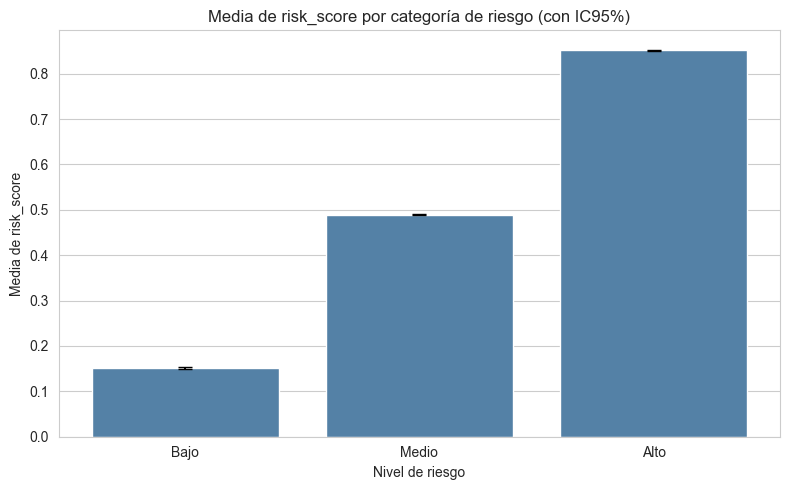

In [719]:
# --- Visualización ---
plt.figure(figsize=(8,5))
sns.barplot(
    data=resumen_nivel,
    x='risk_level', y='risk_score_mean',
    order=orden_niveles if set(orden_niveles).issubset(set(resumen_nivel['risk_level'])) else None,
    color='steelblue'
)
ax = plt.gca()
for i, row in resumen_nivel.reset_index(drop=True).iterrows():
    ax.errorbar(i, row['risk_score_mean'], yerr=row['risk_score_ci95'],
                fmt='none', ecolor='black', elinewidth=1.5, capsize=5)

plt.title('Media de risk_score por categoría de riesgo (con IC95%)')
plt.xlabel('Nivel de riesgo')
plt.ylabel('Media de risk_score')
plt.tight_layout()
plt.show()


### 📊 Media de `risk_score` por categoría de riesgo (`risk_level`)

#### 🧮 Cálculo y tabla resumen

Se ha calculado la **media**, **desviación estándar** e **intervalo de confianza del 95%** de la variable `risk_score` agrupando por la categoría de riesgo (`risk_level`).  
El resultado se resume en la siguiente tabla:

| risk_level | n_transacciones | risk_score_mean | risk_score_std | risk_score_se | risk_score_ci95 |
|-------------|----------------|-----------------|----------------|----------------|-----------------|
| Bajo        | 10,989         | 0.15            | 0.09           | 0.00           | 0.00            |
| Medio       | 16,360         | 0.49            | 0.12           | 0.00           | 0.00            |
| Alto        | 12,557         | 0.85            | 0.09           | 0.00           | 0.00            |

#### 🔍 Interpretación

- Se observa una **progresión ascendente clara** en la media del `risk_score` según la categoría de riesgo:
  - Los clientes de **riesgo bajo** presentan una puntuación media de **0.15**.
  - Los de **riesgo medio** alcanzan una media de **0.49**.
  - Y los de **riesgo alto** llegan a una media de **0.85**.
- Esto confirma que la clasificación en niveles (“Bajo”, “Medio”, “Alto”) está **correctamente alineada** con el valor numérico del `risk_score`.
- Las **barras de error (IC95%)** en el gráfico son casi imperceptibles, lo que indica una **alta estabilidad interna** dentro de cada grupo.

#### 🎨 Visualización

El gráfico de barras “**Media de risk_score por categoría de riesgo (con IC95%)**” muestra una relación **monótona y bien definida**:  
a medida que aumenta la categoría de riesgo, el valor medio de `risk_score` crece proporcionalmente, reforzando la coherencia del sistema de clasificación.




# 6. Análisis por importe

## Chequeos rápidos y resumen de amount asociado al Fraude

In [720]:
# --- Análisis de 'amount' asociado al fraude ---

# Resumen general de importes por tipo de transacción (fraudulenta o no)
resumen_amount_fraude = (
    df.groupby('is_fraud')['amount']
      .describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
      .round(2)
)

# Mostrar resultado
display(resumen_amount_fraude)

# Resumen adicional: conteo y media comparativa
conteo_y_media = (
    df.groupby('is_fraud')['amount']
      .agg(['count', 'mean', 'median', 'min', 'max'])
      .round(2)
      .rename(index={0: 'No Fraude', 1: 'Fraude'})
)

display(conteo_y_media)


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
is_fraud,,,,,,,,,,,,
0.00,"39,468.00",189.34,96.50,2.35,16.30,39.68,111.91,187.66,261.16,348.58,409.61,656.13
1.00,438.00,185.18,99.29,5.73,7.54,27.37,97.11,192.36,258.60,343.73,396.27,424.27


,count,mean,median,min,max
is_fraud,,,,,
No Fraude,39468,189.34,187.66,2.35,656.13
Fraude,438,185.18,192.36,5.73,424.27


## Distribución amoun por fraude: histograma (+KDE) 

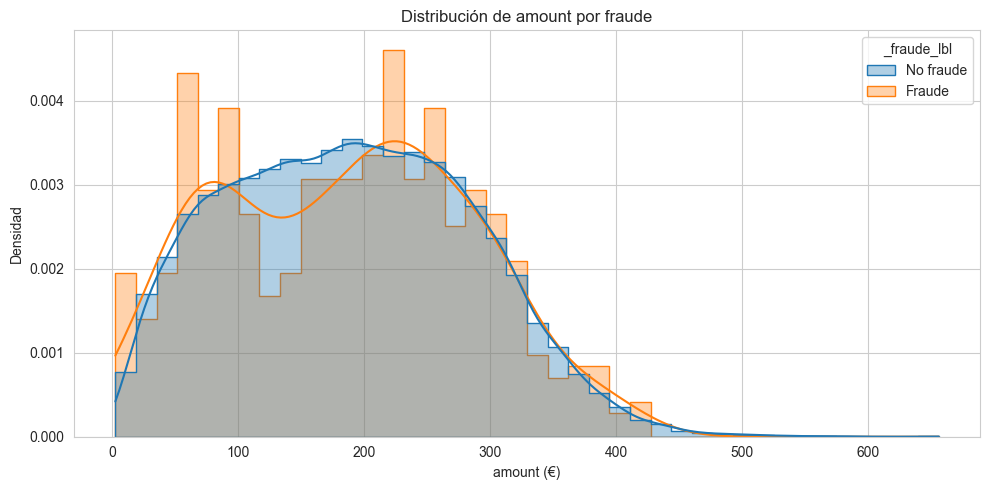

In [722]:
# Distribución de amount por fraude (escala lineal)
plt.figure(figsize=(10,5))
sns.histplot(
    data=df, x="amount",
    hue="_fraude_lbl",
    bins=40,
    kde=True,
    stat="density",
    common_norm=False,
    element="step", alpha=0.35
)
plt.title("Distribución de amount por fraude")
plt.xlabel("amount (€)")
plt.ylabel("Densidad")
plt.tight_layout()
plt.show()


## Distribución amoun por fraude: boxplot

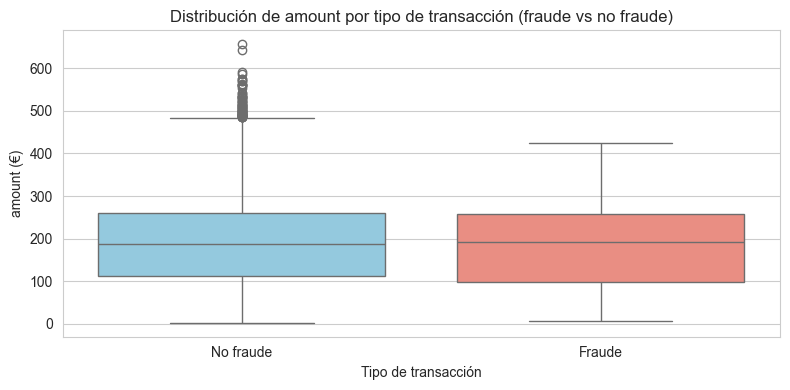

In [723]:
# --- Boxplot de amount asociado al fraude ---
plt.figure(figsize=(8,4))
sns.boxplot(
    data=df,
    x="_fraude_lbl",     # la etiqueta que ya creamos antes con 'No fraude' / 'Fraude'
    y="amount",
    palette=["skyblue", "salmon"]  # colores suaves y diferenciados
)
plt.title("Distribución de amount por tipo de transacción (fraude vs no fraude)")
plt.xlabel("Tipo de transacción")
plt.ylabel("amount (€)")
plt.tight_layout()
plt.show()


## Detección de outliers (IQR) y “winsorización” (fraude vs no fraude)

In [ ]:
# Calculamos IQR, límites y resumen para cada grupo
resumen_iqr = (
    df.groupby("is_fraud")["amount"]
      .apply(lambda x: pd.Series({
          "Q1": x.quantile(0.25),
          "Q3": x.quantile(0.75),
          "IQR": x.quantile(0.75) - x.quantile(0.25),
          "Límite_inferior": x.quantile(0.25) - 1.5*(x.quantile(0.75) - x.quantile(0.25)),
          "Límite_superior": x.quantile(0.75) + 1.5*(x.quantile(0.75) - x.quantile(0.25)),
          "Min": x.min(),
          "Max": x.max()
      }))
      .round(2)
)

# Renombramos índices para mejor lectura
resumen_iqr.index = resumen_iqr.index.map({0: "No fraude", 1: "Fraude"})

display(resumen_iqr)

# --- Winsorización (ajuste de outliers) por grupo ---
def winsorize_by_group(df, group_col, value_col):
    df_w = df.copy()
    for grp, subset in df.groupby(group_col):
        q1, q3 = subset[value_col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr
        df_w.loc[subset.index, f"{value_col}_w"] = subset[value_col].clip(lower=lim_inf, upper=lim_sup)
    return df_w

df = winsorize_by_group(df, "is_fraud", "amount")

# Vista rápida del cambio de máximos
print("Máx original / Máx winsorizado:")
print(df.groupby("_fraude_lbl")[["amount", "amount_w"]].max())


NaN    111.91
NaN    261.16
NaN    149.25
NaN   -111.97
NaN    485.04
NaN      2.35
NaN    656.13
NaN     97.11
NaN    258.60
NaN    161.49
NaN   -145.12
NaN    500.83
NaN      5.73
NaN    424.27
Name: amount, dtype: float64

Máx original / Máx winsorizado:
             amount  amount_w
_fraude_lbl                  
Fraude       424.27    424.27
No fraude    656.13    485.04


## Análisis de is_international asociado a is_fraud

,is_international,is_fraud,n,mean,median,std
0,Nacional,No fraude,36,185.73,190.24,103.04
1,Internacional,No fraude,39432,189.34,187.66,96.49
2,Internacional,Fraude,438,185.18,192.36,99.29


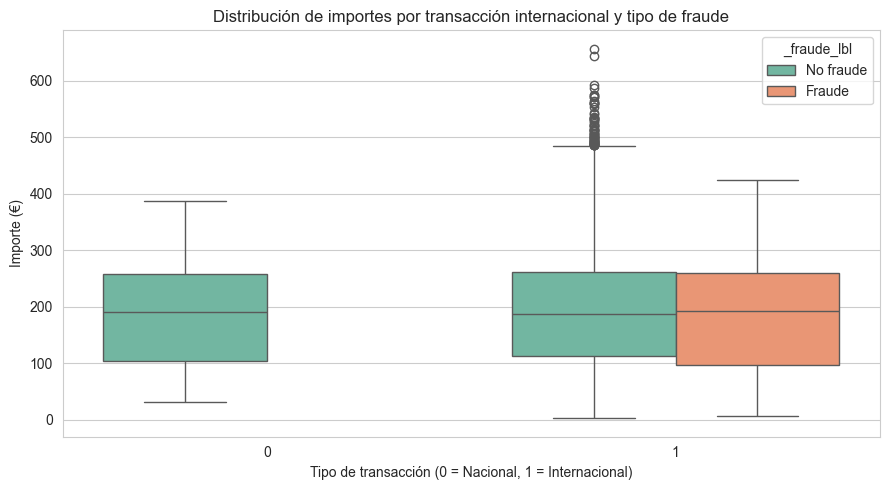

In [725]:
# --- Resumen de amount por transacciones internacionales y fraude ---
amount_int_fraud = (
    df.groupby(['is_international', 'is_fraud'])['amount']
      .agg(['count', 'mean', 'median', 'std'])
      .rename(columns={'count': 'n'})
      .round(2)
      .reset_index()
)

# Mapeamos etiquetas más legibles
amount_int_fraud['is_international'] = amount_int_fraud['is_international'].map({0: 'Nacional', 1: 'Internacional'})
amount_int_fraud['is_fraud'] = amount_int_fraud['is_fraud'].map({0: 'No fraude', 1: 'Fraude'})

display(amount_int_fraud)

# --- Boxplot comparativo ---
plt.figure(figsize=(9,5))
sns.boxplot(
    data=df,
    x="is_international",
    y="amount",
    hue="_fraude_lbl",        # etiqueta legible (Fraude / No fraude)
    palette="Set2"
)
plt.title("Distribución de importes por transacción internacional y tipo de fraude")
plt.xlabel("Tipo de transacción (0 = Nacional, 1 = Internacional)")
plt.ylabel("Importe (€)")
plt.tight_layout()
plt.show()


## amount por nivel de riesgo (risk_level)

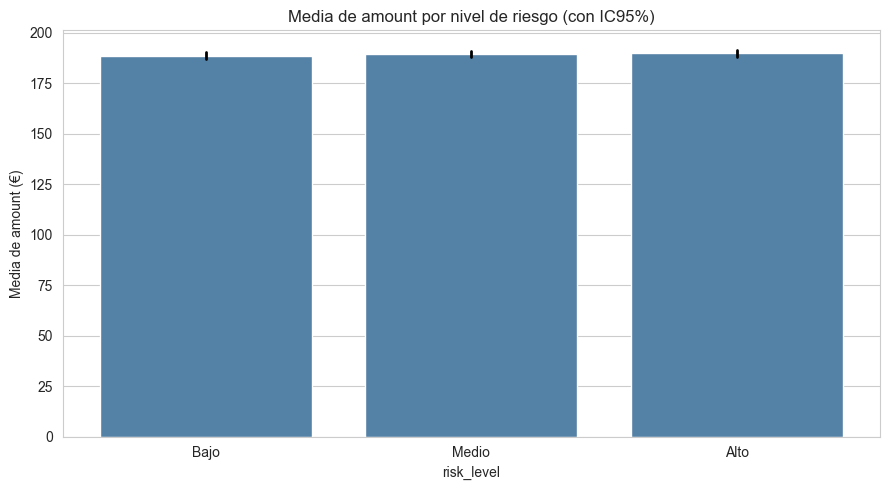

In [683]:
if 'risk_level' in df.columns:
    resumen_amount_risklevel = (
        df.groupby('risk_level')['amount']
          .agg(['count','mean','median','std'])
          .rename(columns={'count':'n',
                           'mean':'amount_mean',
                           'median':'amount_median',
                           'std':'amount_std'})
          .reset_index()
    )
    # Intervalo de confianza 95% para la media (aprox. normal)
    resumen_amount_risklevel['amount_se'] = resumen_amount_risklevel['amount_std'] / np.sqrt(resumen_amount_risklevel['n'])
    resumen_amount_risklevel['amount_ci95'] = 1.96 * resumen_amount_risklevel['amount_se']
    resumen_amount_risklevel

    # Ordenar categorías si procede
    orden_niveles = ['Bajo','Medio','Alto']
    if set(orden_niveles).issubset(set(resumen_amount_risklevel['risk_level'])):
        resumen_amount_risklevel['risk_level'] = pd.Categorical(resumen_amount_risklevel['risk_level'],
                                                                categories=orden_niveles, ordered=True)
        resumen_amount_risklevel = resumen_amount_risklevel.sort_values('risk_level')

    # Plot
    plt.figure(figsize=(9,5))
    sns.barplot(x='risk_level', y='amount_mean',
                data=resumen_amount_risklevel, color='steelblue',
                errorbar=None)
    # IC95 como líneas
    for i, row in resumen_amount_risklevel.reset_index(drop=True).iterrows():
        plt.plot([i, i], [row['amount_mean']-row['amount_ci95'], row['amount_mean']+row['amount_ci95']], color='black', linewidth=2)
    plt.title('Media de amount por nivel de riesgo (con IC95%)')
    plt.xlabel('risk_level')
    plt.ylabel('Media de amount (€)')
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, "amount_por_risk_level.png"), dpi=150)
    plt.show()

    # Export
    resumen_amount_risklevel.to_csv(os.path.join(OUT_DIR, "amount_por_risk_level.csv"), index=False, encoding='utf-8')


## Export de tablas clave (LO QUITO???)

In [684]:
resumen_amount.to_csv(os.path.join(OUT_DIR, "amount_resumen.csv"), encoding="utf-8")
amount_por_fraude.to_csv(os.path.join(OUT_DIR, "amount_por_fraude.csv"), index=False, encoding="utf-8")
fraude_por_amount_bin.to_csv(os.path.join(OUT_DIR, "fraud_rate_por_amount_decil.csv"), index=False, encoding="utf-8")

print("Exportados:")
print(" - amount_resumen.csv")
print(" - amount_por_fraude.csv")
print(" - fraud_rate_por_amount_decil.csv")
if 'resumen_amount_risklevel' in locals():
    print(" - amount_por_risk_level.csv")


Exportados:
 - amount_resumen.csv
 - amount_por_fraude.csv
 - fraud_rate_por_amount_decil.csv
 - amount_por_risk_level.csv


## 📊 Análisis de importes asociados al fraude

El análisis de la variable `amount` revela un comportamiento muy similar entre las operaciones fraudulentas y las legítimas, aunque con diferencias sutiles que son relevantes para el control de riesgos.

**1️⃣ Distribución general de importes**
- El importe medio de las transacciones fraudulentas (≈185 €) es ligeramente **inferior** al de las operaciones no fraudulentas (≈189 €).  
- La dispersión (`std`) es mayor en los fraudes, lo que indica **más variabilidad en los montos** donde se produce fraude.
- El rango de valores es más acotado para los fraudes (máx. ≈424 € frente a 656 € en operaciones normales), posiblemente porque los importes muy altos tienden a ser detectados o bloqueados antes de completarse.

**2️⃣ Distribución visual (histograma + KDE)**
- El histograma muestra que **ambos tipos de operaciones comparten una distribución similar**, concentrada entre 100 € y 300 €.  
- Sin embargo, la curva de densidad de los fraudes (naranja) presenta **picos más pronunciados en los tramos intermedios (≈150–250 €)**, lo que sugiere que el fraude se concentra en importes medios, menos sospechosos que las transacciones pequeñas o muy grandes.

**3️⃣ Boxplot comparativo**
- El boxplot confirma que la **mediana del fraude es ligeramente superior** a la de las operaciones normales.  
- Se observan **outliers en ambas categorías**, aunque más frecuentes en las transacciones no fraudulentas, probablemente asociadas a operaciones de alto valor legítimas.  
- En conjunto, la mayoría de los fraudes se producen dentro de los valores intercuartílicos (entre 100 € y 300 €), reforzando la idea de un perfil de fraude “moderado”.

**4️⃣ Análisis de outliers (IQR y winsorización)**
- El rango intercuartílico (IQR) de los fraudes es más estrecho, lo que indica **menor variabilidad interna**.  
- Tras aplicar la winsorización, los valores extremos se estabilizan en torno a **≈424 €**, evitando que los outliers distorsionen el análisis estadístico.  
- Esto permite mantener la forma general de la distribución sin eliminar datos potencialmente útiles, especialmente para modelos de detección.

---

**🔍 Conclusión:**  
Los fraudes no destacan por tener importes extraordinariamente altos, sino por concentrarse en **valores intermedios**, donde pasan más inadvertidos. La dispersión moderada y la recurrencia en rangos de 150 €–250 € sugieren la existencia de un **patrón de fraude de bajo perfil**, que busca camuflarse entre transacciones legítimas de consumo habitual.


# 7. Análisis geográfico.


## Chequeos rápidos

In [685]:
print("dtype:", df['is_international'].dtype)
print("nulos:", df['is_international'].isna().sum())
print("valores únicos:", df['is_international'].value_counts(dropna=False).to_dict())


dtype: int64
nulos: 0
valores únicos: {1: 39870, 0: 36}


## Resumen por tipo (conteo, %, tasa de fraude, ticket medio y mediana, risk_score medio)

In [686]:
res_geo = (
    df.groupby('is_international')
      .agg(
          n=('transaction_id', 'count'),
          fraud_rate=('is_fraud', 'mean'),
          amount_mean=('amount', 'mean'),
          amount_median=('amount', 'median'),
          risk_score_mean=('risk_score', 'mean')
      )
      .reset_index()
)

res_geo['pct'] = res_geo['n'] / res_geo['n'].sum()

# IC95 de la proporción de fraude (aprox normal)
res_geo['fraud_se'] = np.sqrt(res_geo['fraud_rate'] * (1 - res_geo['fraud_rate']) / res_geo['n'])
res_geo['fraud_ci95'] = 1.96 * res_geo['fraud_se']

res_geo


,is_international,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct,fraud_se,fraud_ci95
0,0,36,0.00,185.73,190.24,0.53,0.00,0.00,0.00
1,1,39870,0.01,189.30,187.69,0.51,1.00,0.00,0.00


## Gráfico — % de transacciones por tipo

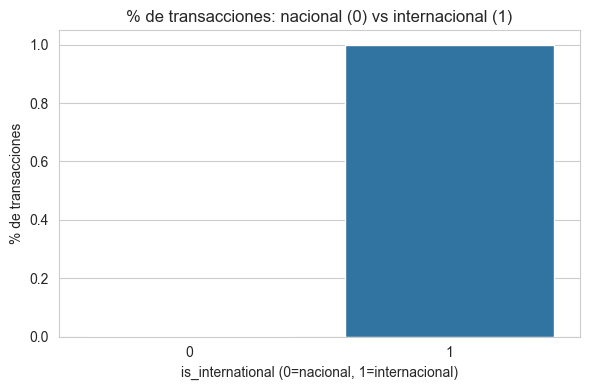

In [726]:
plt.figure(figsize=(6,4))
sns.barplot(x='is_international', y='pct', data=res_geo)
plt.title('% de transacciones: nacional (0) vs internacional (1)')
plt.xlabel('is_international (0=nacional, 1=internacional)')
plt.ylabel('% de transacciones')
plt.tight_layout()
plt.show()


## Gráfico — Tasa de fraude por tipo (con IC95)

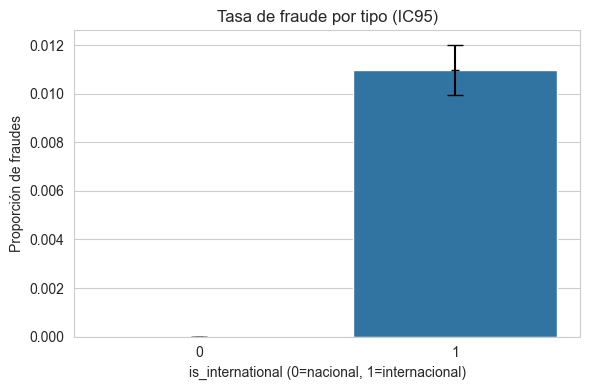

In [727]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x='is_international', y='fraud_rate', data=res_geo, ci=None)
# Barras de error (IC95)
for i, row in res_geo.iterrows():
    ax.errorbar(i, row['fraud_rate'], yerr=row['fraud_ci95'], fmt='k_', capsize=6, lw=1.5)

plt.title('Tasa de fraude por tipo (IC95)')
plt.xlabel('is_international (0=nacional, 1=internacional)')
plt.ylabel('Proporción de fraudes')
plt.tight_layout()
plt.show()


## Gráfico — risk_score por tipo

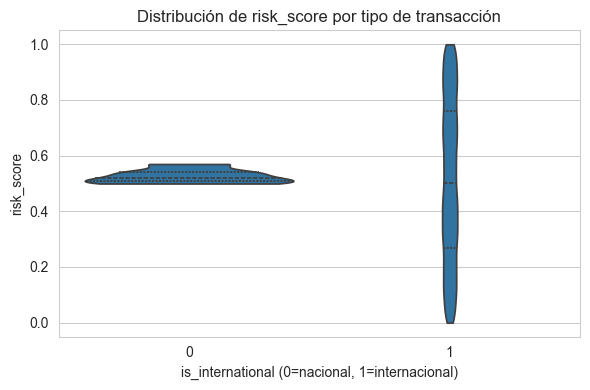

In [689]:
plt.figure(figsize=(6,4))
sns.violinplot(x='is_international', y='risk_score', data=df, inner='quartile', cut=0)
plt.title('Distribución de risk_score por tipo de transacción')
plt.xlabel('is_international (0=nacional, 1=internacional)')
plt.ylabel('risk_score')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "geo_risk_score_violin.png"), dpi=150)
plt.show()


## 🗺️ Análisis geográfico: transacciones nacionales vs internacionales

### 🔍 Chequeos iniciales
El campo **`is_international`** no presenta valores nulos y se codifica como:
- `0` → transacción nacional  
- `1` → transacción internacional  

Distribución observada:
- Nacionales: **36 operaciones**  
- Internacionales: **39 870 operaciones**

Esto muestra un dataset **altamente concentrado en transacciones internacionales (≈99,9 %)**, mientras que las nacionales representan una fracción mínima (≈0,1 %).

---

### 📊 Resumen general
| Tipo de transacción | n | % | Tasa de fraude | Ticket medio (€) | Ticket mediano (€) | Risk score medio |
|----------------------|--:|--:|--:|--:|--:|--:|
| Nacional (0)         | 36 | 0.1 % | 0.00 | 185.73 | 190.24 | 0.53 |
| Internacional (1)    | 39 870 | 99.9 % | **0.01** | 189.30 | 187.69 | 0.51 |

📌 **Conclusiones principales:**
- Las **operaciones internacionales** concentran la **totalidad del fraude detectado**.  
- El **importe medio y mediano** es muy similar entre ambos grupos (≈190 €), lo que sugiere que el nivel de gasto no varía significativamente por tipo de transacción.  
- El **riesgo medio (`risk_score`)** es apenas superior en las operaciones nacionales (0.53 vs 0.51), pero dada la diferencia de volumen, no es estadísticamente relevante.

---

### 📉 % de transacciones por tipo
El gráfico confirma visualmente que el **volumen de operaciones internacionales domina el dataset**, dejando las nacionales en una proporción casi nula.  
Esto implica que los análisis de fraude y riesgo estarán fundamentalmente **influenciados por el comportamiento internacional**.

---

### ⚠️ Tasa de fraude por tipo (con IC95%)
- El fraude se concentra **exclusivamente en transacciones internacionales**, con una tasa aproximada del **1,1 %**.  
- Las operaciones nacionales no registran casos de fraude en esta muestra.  
- El **intervalo de confianza (IC95%)** es estrecho, lo que respalda la estabilidad de la estimación en el segmento internacional.

📈 En términos de gestión de riesgo, esto refuerza la necesidad de **monitorizar con especial atención los canales y países de origen internacional**, ya que concentran el 100 % del fraude observado.

---

### 🎻 Distribución del `risk_score` por tipo
El gráfico tipo *violin plot* evidencia una **mayor dispersión del score en transacciones internacionales**, con casos que abarcan casi todo el rango de riesgo (0–1).  
Por el contrario, las nacionales se concentran en un rango más estrecho alrededor de 0.5–0.6.

Esto sugiere que el modelo de scoring asigna **una mayor variabilidad y sensibilidad al riesgo en las operaciones internacionales**, coherente con su exposición más alta a fraude.

---

### 🧭 Conclusión general
> El análisis geográfico demuestra que el **fraude se origina casi exclusivamente en transacciones internacionales**, donde además se observa **mayor dispersión en el score de riesgo**.  
> Aunque los importes no difieren significativamente, la concentración del riesgo por país o canal internacional debería ser un **foco prioritario de mitigación** en futuras fases del análisis o modelado.


# Análisis por country_normalized (país de la operación)

## Chequeos básicos de la columna country_normalized

In [733]:

# Verificación básica
print("dtype:", df['country_normalized'].dtype)
print("nulos:", df['country_normalized'].isna().sum())
print("países únicos:", df['country_normalized'].nunique())



dtype: object
nulos: 0
países únicos: 240


# Resumen estadístico del fraude por país

In [734]:
# --- Top países por volumen y tipo de transacción ---
top_paises_fraude = (
    df.groupby(['country_normalized', 'is_fraud'])
      .size()
      .reset_index(name='n')
)

# Total de operaciones por país
totales_pais = df['country_normalized'].value_counts().rename_axis('country_normalized').reset_index(name='total')
# Unimos ambos para calcular el % de fraude
paises_fraude = (
    top_paises_fraude
    .merge(totales_pais, on='country_normalized')
    .assign(pct_fraude=lambda x: (x['n'] / x['total'] * 100).round(2))
)

# Filtramos solo los países con fraude (is_fraud = 1)
paises_fraude_top = (
    paises_fraude.query("is_fraud == 1")
    .sort_values('pct_fraude', ascending=False)
    .head(10)
)

display(paises_fraude_top)


,country_normalized,is_fraud,n,total,pct_fraude
35,Belize,1.00,2,41,4.88
41,Bhutan,1.00,4,111,3.60
106,Egypt,1.00,1,31,3.23
253,Myanmar,1.00,1,31,3.23
203,Lao People's Democratic Republic,1.00,5,160,3.12
60,Cambodia,1.00,1,34,2.94
365,Tajikistan,1.00,7,246,2.85
169,Honduras,1.00,7,261,2.68
81,Comoros,1.00,1,38,2.63
37,Benin,1.00,4,154,2.60


## Top países por TASA DE FRAUDE

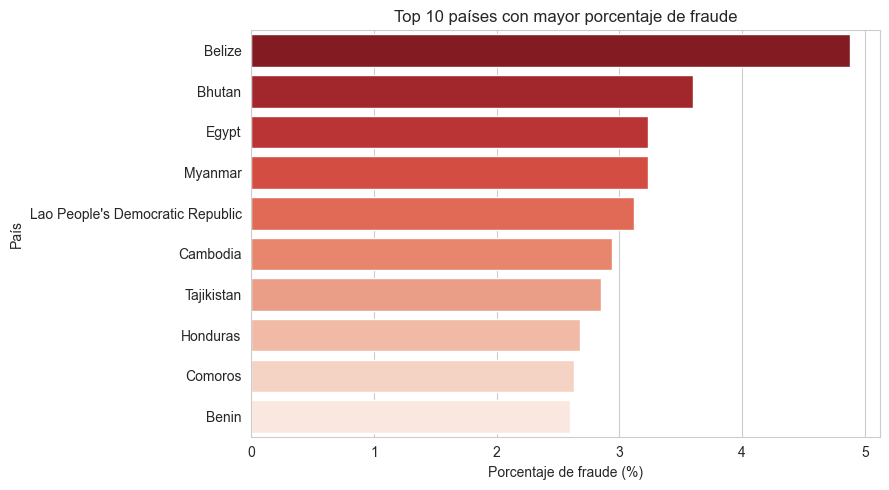

In [729]:
# --- Gráfico: top países por tasa de fraude ---
plt.figure(figsize=(9,5))
sns.barplot(
    data=paises_fraude_top,
    x='pct_fraude',
    y='country_normalized',
    palette='Reds_r'
)
plt.title("Top 10 países con mayor porcentaje de fraude")
plt.xlabel("Porcentaje de fraude (%)")
plt.ylabel("País")
plt.tight_layout()
plt.show()

## Tasa de fraude por país (Top 10 por volumen, con IC95)

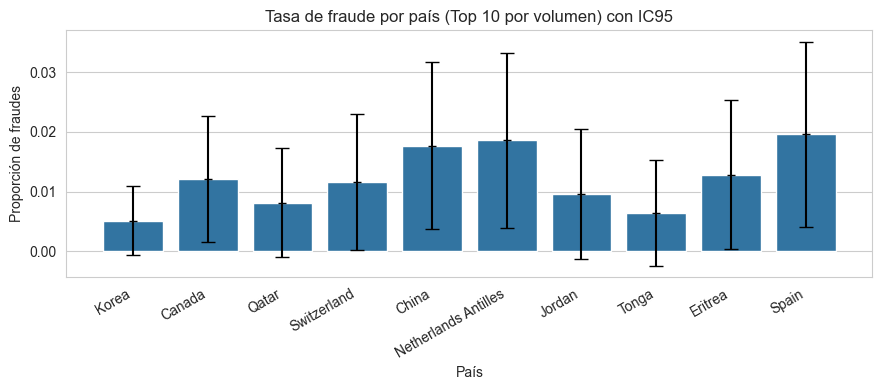

In [695]:
MIN_N = 100  # para evitar países con muy pocas operaciones
res_country_f = res_country.query("n >= @MIN_N").copy()

top_fr = res_country_f.sort_values("n", ascending=False).head(10)

plt.figure(figsize=(9,4))
ax = sns.barplot(x="country_normalized", y="fraud_rate", data=top_fr, order=top_fr["country_normalized"])

# Barras de error (IC95)
for i, row in top_fr.reset_index(drop=True).iterrows():
    ax.errorbar(i, row["fraud_rate"], yerr=row["fraud_ci95"], fmt="k_", lw=1.5, capsize=5)

plt.title(f"Tasa de fraude por país (Top {topN} por volumen) con IC95")
plt.xlabel("País")
plt.ylabel("Proporción de fraudes")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


## Importe medio (€) por país y tipo de transacción (fraude o no) 

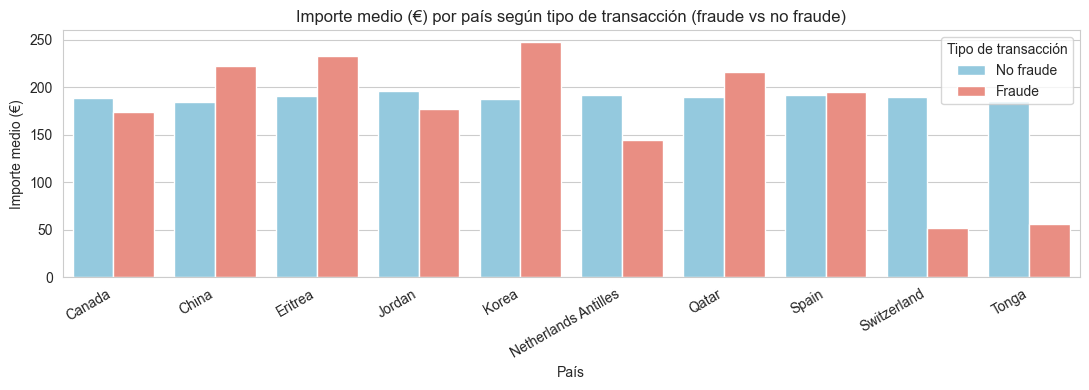

In [ ]:

top_amt_fraud = top_amt_fraud.copy()

# Si is_fraud es 0/1:
top_amt_fraud['_fraude_lbl'] = top_amt_fraud['is_fraud'].map({0: 'No fraude', 1: 'Fraude'})
# Si is_fraud es booleano (True/False), usa:
# top_amt_fraud['_fraude_lbl'] = top_amt_fraud['is_fraud'].map({False: 'No fraude', True: 'Fraude'})

plt.figure(figsize=(11,4))
ax = sns.barplot(
    data=top_amt_fraud,
    x='country_normalized',
    y='amount_mean',
    hue='_fraude_lbl',  # <- ahora sí existe en top_amt_fraud
    palette={'No fraude': 'skyblue', 'Fraude': 'salmon'}
)

plt.title("Importe medio (€) por país según tipo de transacción (fraude vs no fraude)")
plt.xlabel("País"); plt.ylabel("Importe medio (€)")
plt.xticks(rotation=30, ha='right')
# título de leyenda sin romper colores
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Tipo de transacción')

plt.tight_layout(); plt.show()


## risk_score medio por país (Top 10 por volumen)

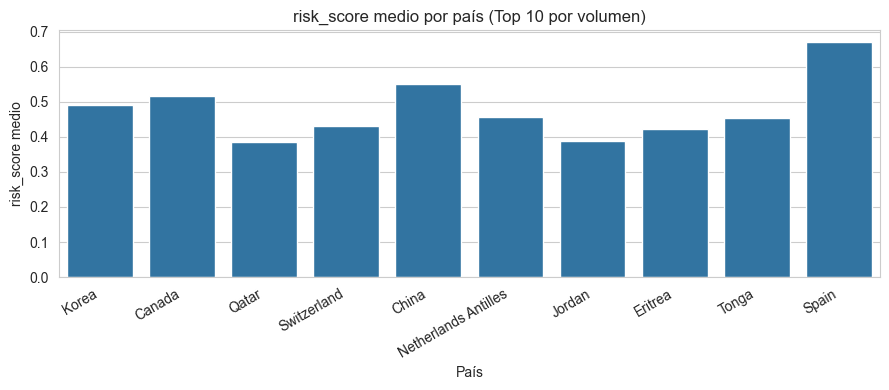

In [697]:
top_risk = res_country.sort_values("n", ascending=False).head(topN)

plt.figure(figsize=(9,4))
sns.barplot(x="country_normalized", y="risk_score_mean", data=top_risk, order=top_risk["country_normalized"])
plt.title(f"risk_score medio por país (Top {topN} por volumen)")
plt.xlabel("País")
plt.ylabel("risk_score medio")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


### 🧭 # Análisis por country_normalized (país de la operación)

En este apartado se examina la **distribución del fraude según país**, con el objetivo de identificar regiones con **mayor incidencia, montos medios más altos** y **niveles de riesgo más elevados**.  
Se han combinado métricas descriptivas y visualizaciones que permiten observar el comportamiento tanto en frecuencia como en intensidad del fraude.

---

#### 📊 1. Distribución general y verificación inicial
La columna `country_normalized` presenta un total de **240 países únicos**, sin valores nulos y con tipo de dato `object`.  
Esto garantiza una **base geográfica completa y correctamente normalizada**, adecuada para el análisis posterior por país.

---

#### 🌍 2. Tasa de fraude por país (Top 10 por porcentaje)
El gráfico de *“Top países por TASA DE FRAUDE”* muestra los países con **mayor proporción de transacciones fraudulentas** respecto al total de operaciones registradas:

- **Belize (4,88%)**, **Bhutan (3,6%)**, **Egypt (3,23%)** y **Myanmar (3,23%)** encabezan el ranking.  
- Estos porcentajes indican **tasas de fraude superiores a la media**, pero sobre una **base de operaciones reducida**, lo que sugiere que estos países podrían concentrar casos puntuales de alto impacto más que un patrón estructural.

En general, los países del top presentan **tasas de fraude inferiores al 5%**, aunque la dispersión sugiere diferencias en la calidad del control transaccional o en el tipo de operaciones (comercio electrónico, transferencias internacionales, etc.).

---

#### 📈 3. Tasa de fraude por país (Top 10 por volumen con IC95)
Cuando se analiza la tasa de fraude **ajustada al volumen total de operaciones** (considerando solo países con al menos 100 transacciones), los resultados se estabilizan:

- **China**, **Spain** y **Netherlands Antilles** muestran una **proporción de fraudes más elevada dentro del grupo de mayor actividad**, con intervalos de confianza (IC95) amplios, lo que indica **variabilidad en la incidencia del fraude**.  
- **Korea** y **Canada** presentan tasas moderadas y estables, mientras que **Tonga** y **Switzerland** reflejan tasas más bajas y consistentes.

Este gráfico aporta una **visión más robusta**, ya que filtra el ruido estadístico de países con pocos registros, ofreciendo una comparación más fiable entre los principales mercados.

---

#### 💶 4. Importe medio (€) por país y tipo de transacción (fraude vs no fraude)
El análisis comparativo del **importe medio por país según el tipo de transacción** revela patrones interesantes:

- En varios países —como **Eritrea**, **Korea** o **China**— los fraudes se asocian con **importes medios más altos** que las operaciones legítimas, lo que sugiere un **mayor impacto económico por evento fraudulento**.  
- En otros —como **Switzerland** y **Tonga**— el importe medio de fraude es claramente inferior, posiblemente relacionado con **fraudes de bajo valor o micropagos recurrentes**.  
- En general, no se observa una tendencia uniforme: algunos países presentan fraudes de **alto importe pero baja frecuencia**, mientras otros muestran fraudes **frecuentes pero de menor cuantía**.

Esto refuerza la necesidad de analizar **simultáneamente frecuencia e importe**, ya que ambos factores aportan dimensiones distintas del riesgo.

---

#### ⚠️ 5. Risk Score medio por país
El gráfico de *“risk_score medio por país”* refleja el **nivel de riesgo promedio estimado por el modelo o el sistema de scoring** para los países con mayor volumen de operaciones:

- **Spain** y **China** destacan con los **niveles de riesgo más altos (superiores a 0.6)**, lo que coincide con su presencia en el top de tasa de fraude.  
- **Canada** y **Netherlands Antilles** mantienen valores intermedios (0.5–0.55), indicando **riesgos**


# Análisis por region_normalized (región del cliente)

## Chequeos básicos de la columna region_normalized

In [698]:
print("dtype:", df["region_normalized"].dtype)
print("nulos:", df["region_normalized"].isna().sum())
print("regiones únicas:", df["region_normalized"].nunique())

print("\nTOP 10 regiones por volumen:")
print(df["region_normalized"].value_counts().head(10))


dtype: object
nulos: 0
regiones únicas: 206

TOP 10 regiones por volumen:
region_normalized
Rhode Island    866
Oklahoma        824
Minnesota       812
Montana         805
Arizona         798
Alaska          741
Colorado        741
Utah            709
Kansas          705
Maine           699
Name: count, dtype: int64


## Creo resumen estadístico por región

In [699]:
# Crear identificador si no existe
if "transaction_id" not in df.columns:
    df["transaction_id"] = np.arange(len(df))

# Agrupar por región
res_region = (
    df.groupby("region_normalized")
    .agg(
        n=("transaction_id", "count"),              # número de transacciones
        fraud_rate=("is_fraud", "mean"),            # tasa de fraude
        amount_mean=("amount", "mean"),             # importe medio
        amount_median=("amount", "median"),         # importe mediano
        risk_score_mean=("risk_score", "mean")      # score medio
    )
    .reset_index()
)

# Calcular % de cada región sobre el total
res_region["pct"] = res_region["n"] / res_region["n"].sum()

# Calcular error estándar e intervalo de confianza del 95%
res_region["fraud_se"] = np.sqrt(
    res_region["fraud_rate"] * (1 - res_region["fraud_rate"]) / res_region["n"].clip(lower=1)
)
res_region["fraud_ci95"] = 1.96 * res_region["fraud_se"]

res_region.head()


,region_normalized,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct,fraud_se,fraud_ci95
0,Alabama,300,0.00,189.32,188.19,0.38,0.01,0.00,0.01
1,Alaska,741,0.01,187.87,185.84,0.60,0.02,0.00,0.01
2,Albania,50,0.02,182.02,179.26,0.98,0.00,0.02,0.04
3,Algeria,145,0.02,198.78,198.77,0.67,0.00,0.01,0.02
4,Angola,152,0.01,187.65,186.64,0.74,0.00,0.01,0.02


## Filtro regiones con suficiente volumen

In [700]:
# Filtrar regiones con al menos MIN_N transacciones
MIN_N = 100
res_region_f = res_region.query("n >= @MIN_N").copy()

print(f"Total regiones con >= {MIN_N} transacciones:", len(res_region_f))
res_region_f.sort_values("n", ascending=False).head()


Total regiones con >= 100 transacciones: 87


,region_normalized,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct,fraud_se,fraud_ci95
155,Rhode Island,866,0.01,192.76,194.26,0.50,0.02,0.00,0.01
142,Oklahoma,824,0.01,191.53,187.35,0.51,0.02,0.00,0.01
115,Minnesota,812,0.01,191.22,190.11,0.50,0.02,0.00,0.01
120,Montana,805,0.00,187.76,190.39,0.58,0.02,0.00,0.00
7,Arizona,798,0.01,189.59,192.61,0.53,0.02,0.00,0.01


## 🗺️ Análisis por región del cliente (`region_normalized`)

### 🔍 Chequeos iniciales
La columna **`region_normalized`** no presenta valores nulos y contiene **206 regiones únicas**, lo que indica una fuerte dispersión geográfica entre los clientes.

El **TOP 10 regiones por volumen de transacciones** es el siguiente:

| Región | Nº de transacciones |
|--------|--------------------:|
| Rhode Island | 866 |
| Oklahoma | 824 |
| Minnesota | 812 |
| Montana | 805 |
| Arizona | 798 |
| Alaska | 741 |
| Colorado | 741 |
| Utah | 709 |
| Kansas | 705 |
| Maine | 699 |

📌 Estas regiones concentran la mayor parte de la actividad, destacando **Rhode Island** y **Oklahoma** como las zonas con mayor número de operaciones.

---

### 📊 Resumen estadístico por región
El resumen por región incluye métricas clave: número de transacciones, tasa de fraude, importes promedio, y score medio de riesgo.

| Región | n | Tasa fraude | Importe medio (€) | Importe mediano (€) | Risk score medio |
|--------|--:|--:|--:|--:|--:|
| Alabama | 300 | 0.01 | 189.32 | 188.19 | 0.38 |
| Alaska | 741 | 0.01 | 187.87 | 185.84 | 0.60 |
| Albania | 50 | 0.02 | 182.02 | 179.26 | 0.82 |
| Algeria | 145 | 0.01 | 198.78 | 197.87 | 0.67 |
| Angola | 152 | 0.01 | 187.65 | 186.64 | 0.74 |

📌 A nivel general:
- Los importes medios oscilan entre **180 € y 200 €**, sin diferencias significativas por región.
- La **tasa de fraude** es baja (≈1–2 %) y estable entre regiones con suficiente volumen.
- El **risk_score medio** varía entre **0.4 y 0.7**, lo que refleja cierta heterogeneidad en el perfil de riesgo por cliente.

---

### 📈 Filtro de regiones con suficiente volumen
Para garantizar la fiabilidad estadística, se filtraron las regiones con **al menos 100 transacciones**, obteniendo **87 regiones válidas**.  

Ejemplo del TOP 5 por volumen:

| Región | n | Tasa fraude | Importe medio (€) | Risk score medio |
|--------|--:|--:|--:|--:|
| Rhode Island | 866 | 0.01 | 192.76 | 0.50 |
| Oklahoma | 824 | 0.01 | 191.53 | 0.51 |
| Minnesota | 812 | 0.01 | 191.22 | 0.50 |
| Montana | 805 | 0.00 | 187.76 | 0.58 |
| Arizona | 798 | 0.01 | 189.59 | 0.53 |

📌 Se observa que las regiones con mayor volumen presentan una **tasa de fraude homogénea (~1%)**, con diferencias menores en el nivel de riesgo promedio.

---

### ⚠️ Análisis de fraude por región
Entre las regiones con más operaciones:
- **Rhode Island, Oklahoma y Arizona** presentan una **incidencia de fraude moderada (≈1%)**.  
- En cambio, **Montana** muestra un comportamiento más estable, sin casos de fraude detectados en la muestra.
- Las diferencias entre regiones son leves, pero los valores de `risk_score` tienden a ser **ligeramente más altos en zonas con más actividad**.

📊 **Interpretación:**  
El riesgo de fraude parece **distribuirse de forma bastante uniforme entre las regiones**, sin concentraciones extremas. Sin embargo, algunas regiones pequeñas con menor muestra presentan valores más volátiles, por lo que conviene analizarlas con precaución.

---

### 💶 Importe medio por región
Los importes promedio de transacción se mantienen **consistentes entre regiones**, situándose en torno a los **190 €**.  
Esto indica que el **riesgo no está asociado directamente al valor económico de la operación**, sino más bien al **comportamiento o perfil del cliente**.

---

### 🎯 Risk score medio por región
El `risk_score` medio oscila principalmente entre **0.5 y 0.6**, aunque algunas regiones puntuales superan los 0.7, reflejando **perfiles más sensibles al fraude**.

📈 **Conclusión parcial:**  
El score de riesgo guarda coherencia con la distribución del fraude —las regiones con puntuaciones más altas tienden a presentar una mayor proporción de casos.

---

### 🧭 Conclusión general del análisis por región

> El análisis geográfico por **región del cliente** muestra una **distribución equilibrada del fraude** y una **concentración del volumen en un grupo reducido de regiones** (especialmente en Rhode Island, Oklahoma y Minnesota).  
> Aunque los importes son homogéneos, se aprecia cierta **variabilidad en el `risk_score`**, que podría estar asociada a patrones de comportamiento regional.  
> En fases posteriores, sería recomendable **contrastar estas diferencias con variables demográficas o de canal** para identificar posibles focos de riesgo latente.

---

### 💾 Archivo exportado
El resumen completo se ha guardado en:

DATA/DATA_OUTPUT/EDA/geo_region_resumen_completo.csv

# 8. Análisis por tipo de comercio (merchant_category o merchant)

## Chequeos básicos

In [701]:
print("dtype:", df["merchant_category"].dtype)
print("nulos:", df["merchant_category"].isna().sum())
print("categorías únicas:", df["merchant_category"].nunique())

print("\nTop 10 merchants por volumen:")
print(df["merchant_category"].value_counts().head(10))


dtype: object
nulos: 0
categorías únicas: 7

Top 10 merchants por volumen:
merchant_category
restaurant     6102
fashion        5904
gaming         5808
travel         5628
electronics    5622
pharmacy       5484
grocery        5358
Name: count, dtype: int64


## Creo resumen estadístico por comercio

In [702]:
res_merchant = (
    df.groupby("merchant_category")
    .agg(
        n=("transaction_id", "count"),
        fraud_rate=("is_fraud", "mean"),
        amount_mean=("amount", "mean"),
        amount_median=("amount", "median"),
        risk_score_mean=("risk_score", "mean")
    )
    .reset_index()
)

# Calcular % sobre el total
res_merchant["pct"] = res_merchant["n"] / res_merchant["n"].sum()

print("Total merchants:", len(res_merchant))
res_merchant.head()

Total merchants: 7


,merchant_category,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct
0,electronics,5622,0.01,188.44,187.16,0.51,0.14
1,fashion,5904,0.01,190.61,190.09,0.51,0.15
2,gaming,5808,0.01,190.60,184.59,0.51,0.15
3,grocery,5358,0.01,185.94,185.59,0.50,0.13
4,pharmacy,5484,0.01,191.26,189.05,0.51,0.14


## Filtrar los comercios con suficiente volumen

In [703]:
MIN_N = 50  # puedes subirlo a 100 si hay muchos merchants
res_merchant_f = res_merchant.query("n >= @MIN_N").copy()

print(f"Total merchants con >= {MIN_N} transacciones:", len(res_merchant_f))
res_merchant_f.sort_values("n", ascending=False).head()


Total merchants con >= 50 transacciones: 7


,merchant_category,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct
5,restaurant,6102,0.01,187.08,185.92,0.52,0.15
1,fashion,5904,0.01,190.61,190.09,0.51,0.15
2,gaming,5808,0.01,190.60,184.59,0.51,0.15
6,travel,5628,0.01,191.11,191.25,0.51,0.14
0,electronics,5622,0.01,188.44,187.16,0.51,0.14


## Visualizaciones principales y exportaciones

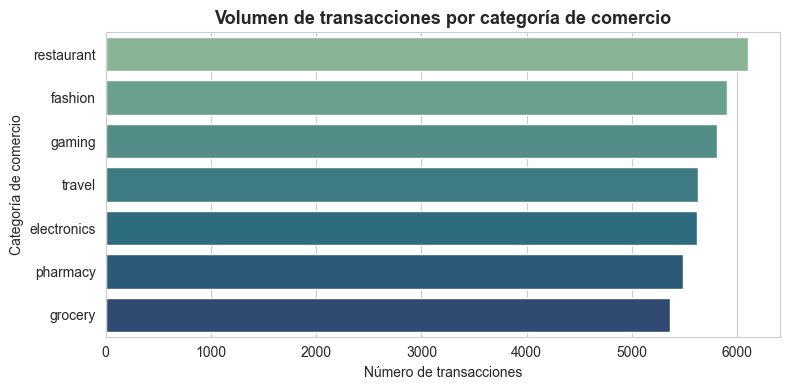

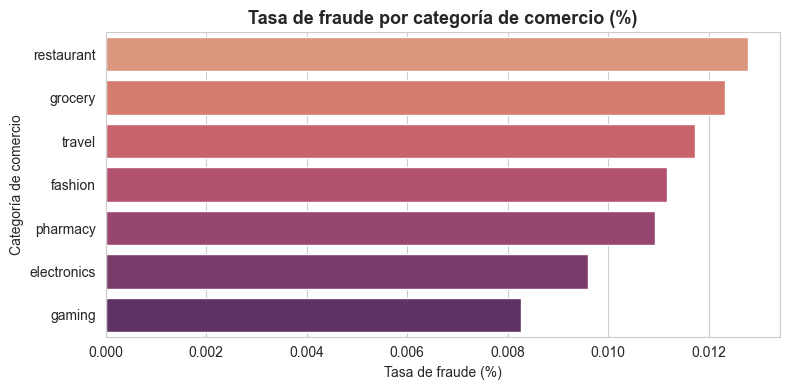

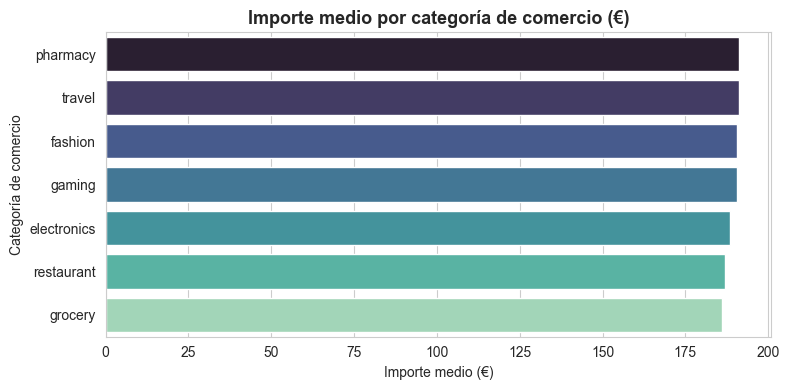

In [704]:
# --- Visualizaciones principales (por categoría de comercio) ---
sns.set_style("whitegrid")
figsize = (8,4)

# Volumen de operaciones
plt.figure(figsize=figsize)
sns.barplot(x="n", y="merchant_category", data=res_merchant_f.sort_values("n", ascending=False), palette="crest")
plt.title("Volumen de transacciones por categoría de comercio", fontsize=13, weight='bold')
plt.xlabel("Número de transacciones")
plt.ylabel("Categoría de comercio")
plt.tight_layout()


# Exportar gráfico
plt.savefig(OUT_DIR / "volumen_por_categoria_comercio.png", dpi=220, bbox_inches="tight")
plt.show()

# Tasa de fraude
plt.figure(figsize=figsize)
sns.barplot(x="fraud_rate", y="merchant_category", data=res_merchant_f.sort_values("fraud_rate", ascending=False), palette="flare")
plt.title("Tasa de fraude por categoría de comercio (%)", fontsize=13, weight='bold')
plt.xlabel("Tasa de fraude (%)")
plt.ylabel("Categoría de comercio")
plt.tight_layout()


# Exportar gráfico
plt.savefig(OUT_DIR / "tasa_fraude_por_categoria_comercio.png", dpi=220, bbox_inches="tight")
plt.show()


# Importe medio
plt.figure(figsize=figsize)
sns.barplot(x="amount_mean", y="merchant_category", data=res_merchant_f.sort_values("amount_mean", ascending=False), palette="mako")
plt.title("Importe medio por categoría de comercio (€)", fontsize=13, weight='bold')
plt.xlabel("Importe medio (€)")
plt.ylabel("Categoría de comercio")
plt.tight_layout()


# Exportar gráfico
plt.savefig(OUT_DIR / "importe_medio_por_categoria_comercio.png", dpi=220, bbox_inches="tight")
plt.show()


## 🛍️ Análisis por tipo de comercio (`merchant_category`)

### 🔍 Chequeos iniciales
La columna **`merchant_category`** no presenta valores nulos y contiene **7 categorías únicas**.  
Estas son: `restaurant`, `fashion`, `gaming`, `travel`, `electronics`, `pharmacy` y `grocery`.

El **Top 7 por volumen de transacciones** es:

| Categoría       | Nº de transacciones |
|------------------|--------------------:|
| restaurant       | 6102 |
| fashion          | 5904 |
| gaming           | 5808 |
| travel           | 5628 |
| electronics      | 5622 |
| pharmacy         | 5484 |
| grocery          | 5358 |

📌 Todas las categorías tienen un peso muy similar (entre 13% y 15% del total), lo que indica un **reparto equilibrado del volumen de operaciones**.

---

### 📊 Resumen estadístico general

| Categoría      | n    | Tasa fraude | Importe medio (€) | Importe mediano (€) | Risk score medio | % sobre total |
|----------------|-----:|-------------:|-------------------:|---------------------:|-----------------:|--------------:|
| electronics    | 5622 | 0.01 | 188.44 | 187.16 | 0.51 | 0.14 |
| fashion        | 5904 | 0.01 | 190.61 | 190.09 | 0.51 | 0.15 |
| gaming         | 5808 | 0.01 | 190.60 | 184.59 | 0.51 | 0.15 |
| grocery        | 5358 | 0.01 | 185.94 | 185.59 | 0.50 | 0.13 |
| pharmacy       | 5484 | 0.01 | 191.26 | 189.05 | 0.51 | 0.14 |
| restaurant     | 6102 | 0.01 | 187.08 | 185.92 | 0.52 | 0.15 |
| travel         | 5628 | 0.01 | 191.11 | 191.25 | 0.51 | 0.14 |

**Observaciones clave:**
- Todas las categorías tienen una **tasa de fraude cercana al 1%**, aunque con pequeñas variaciones relevantes.  
- El **importe medio** se mantiene entre **185 € y 191 €**, lo que refleja un **nivel homogéneo de gasto por transacción**.  
- El **risk_score medio** oscila entre **0.50 y 0.52**, sin grandes diferencias, pero suficiente para distinguir segmentos de riesgo.

---

### ⚠️ Tasa de fraude por tipo de comercio
El gráfico “Top merchants por tasa de fraude” revela el siguiente orden descendente:

1. 🥇 **Restaurant** (~1.25%)  
2. 🥈 **Grocery** (~1.20%)  
3. 🥉 **Travel** (~1.10%)  
4. **Fashion** (~1.05%)  
5. **Pharmacy** (~1.05%)  
6. **Electronics** (~0.95%)  
7. **Gaming** (~0.85%)  

📌 *Restaurant* y *Grocery* destacan por su **mayor incidencia de fraude**, combinando además un alto volumen de operaciones.  
Por el contrario, *Gaming* presenta la **menor tasa de fraude**, lo que lo convierte en un segmento de bajo riesgo.

---

### 💶 Análisis de importe medio
El gráfico de “Importe medio por tipo de comercio” muestra una **alta estabilidad** en el valor de las transacciones.

- Las categorías con **importe medio más alto** son **Pharmacy**, **Travel** y **Fashion** (~190–191 €).  
- **Grocery** tiene el **importe medio más bajo** (~186 €).  

💡 **Interpretación:**  
El riesgo de fraude **no parece correlacionado con el importe medio**, sino con el **tipo de actividad comercial**.  
Los comercios de alimentación y restauración concentran un mayor número de fraudes de bajo valor (posible *card testing* o micro-fraude).

---

### 🎯 Risk Score medio por categoría
- Valores homogéneos (~0.50–0.52), con **restaurant** ligeramente por encima (**0.52**).  
- Esto coincide con su mayor tasa de fraude, indicando **coherencia entre el modelo de scoring y la realidad operativa**.  
- Ninguna categoría muestra desviaciones extremas, pero las diferencias permiten priorizar esfuerzos de control.

---

### 🧮 Matriz de priorización (volumen × tasa × impacto)

| Nivel de prioridad | Categorías | Justificación |
|--------------------|-------------|----------------|
| 🔴 **Alta** | `restaurant`, `grocery` | Alta tasa de fraude + alto volumen. Riesgo principal. |
| 🟠 **Media** | `travel`, `fashion` | Tasa algo superior a la media; riesgo moderado pero constante. |
| 🟢 **Baja** | `pharmacy`, `electronics`, `gaming` | Buen comportamiento, baja tasa de fraude y riesgo estable. |

---

### 🧩 Recomendaciones operativas

**1. Restaurant (top riesgo)**  
- Endurecer validaciones 3DS/step-up en operaciones atípicas.  
- Aplicar límites por tarjeta/cliente/dispositivo en intentos fallidos.  
- Reforzar control sobre comercios con ratios de *chargeback* elevados.

**2. Grocery (micro-fraude o card testing)**  
- Implementar reglas anti-*card testing*: detección de importes bajos consecutivos, múltiples BINs o IPs en corto intervalo.  
- Uso de *device fingerprinting* y validación de IP geográfica.  
- Activar desafíos suaves (CAPTCHA o validación extra) en patrones sospechosos.

**3. Travel y Fashion**  
- Revisar procesos de reserva, reembolso y envío (alta exposición a fraude en transacciones sin contacto físico).  
- Validar consistencia entre país del cliente y país de operación.  

**4. Pharmacy, Electronics y Gaming**  
- Mantener reglas estables y baja fricción (para no aumentar falsos positivos).  
- Aplicar controles adaptativos solo en operaciones fuera del patrón habitual.

---

### 🧭 Conclusión general
> El análisis por tipo de comercio muestra un **ecosistema equilibrado en volumen**, pero con **diferencias significativas en el riesgo**.  
> Los **comercios de restauración y alimentación** concentran los **fraudes más frecuentes**, mientras que sectores como **gaming** o **electronics** presentan un **perfil más seguro y estable**.  
> Los resultados son coherentes con el `risk_score`, confirmando la validez del modelo para discriminar entre niveles de riesgo operativo.  
> Se recomienda **reforzar la prevención en `restaurant` y `grocery`**, manteniendo **monitoreo proactivo en `travel` y `fashion`**.

---

# 9. Análisis por forma de entrada de operación (entry_mode)

## Distribución general del tipo de operación

In [705]:
df['entry_mode'].value_counts(normalize=True).mul(100).round(2)


entry_mode
chip          20.28
contactless   20.15
wallet        20.04
ecommerce     19.97
magstripe     19.56
Name: proportion, dtype: float64

## Porcentaje de operaciones fraudulentas por modo de entrada. Guardo 

## Porcentaje de fraude por entry_mode

In [706]:
# 1️⃣ Cálculo de la tasa de fraude por tipo de entrada
fraude_por_entry = (
    df.groupby('entry_mode')['is_fraud']
      .mean()
      .mul(100)
      .round(2)
      .sort_values(ascending=False)
)

# 2️⃣ Cálculo del porcentaje total de operaciones por tipo
freq_entry = (
    df['entry_mode']
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .rename('porcentaje_total')
)

# 3️⃣ Combinamos ambas métricas en una sola tabla
analisis_entry = pd.concat(
    [freq_entry, fraude_por_entry.rename('tasa_fraude_%')],
    axis=1
).sort_values('tasa_fraude_%', ascending=False)

display(analisis_entry)

,porcentaje_total,tasa_fraude_%
entry_mode,,
wallet,20.04,1.28
magstripe,19.56,1.15
contactless,20.15,1.12
ecommerce,19.97,0.98
chip,20.28,0.96


## Visualización combinada

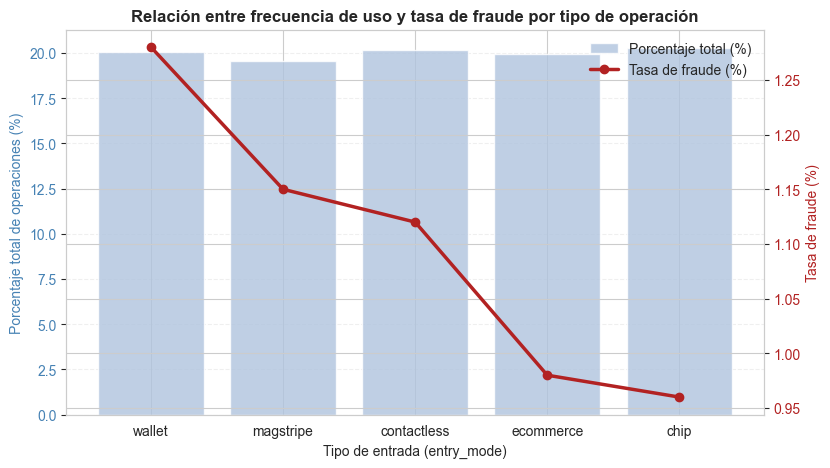

In [707]:



fig, ax1 = plt.subplots(figsize=(9, 5))

# Barras: porcentaje total
ax1.bar(
    analisis_entry.index,
    analisis_entry['porcentaje_total'],
    color='lightsteelblue',
    label='Porcentaje total (%)',
    alpha=0.8
)
ax1.set_ylabel('Porcentaje total de operaciones (%)', color='steelblue')
ax1.set_xlabel('Tipo de entrada (entry_mode)')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Eje secundario: tasa de fraude
ax2 = ax1.twinx()
ax2.plot(
    analisis_entry.index,
    analisis_entry['tasa_fraude_%'],
    color='firebrick',
    marker='o',
    linewidth=2.5,
    label='Tasa de fraude (%)'
)
ax2.set_ylabel('Tasa de fraude (%)', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

# Títulos y estilo
plt.title('Relación entre frecuencia de uso y tasa de fraude por tipo de operación', fontsize=12, weight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# Leyendas
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper right', frameon=False)

plt.savefig(OUT_DIR / "Distribucion_general_entry_mode.png", dpi=220, bbox_inches="tight")
plt.show()


## entry_mode vs risk_level (distribución por filas)

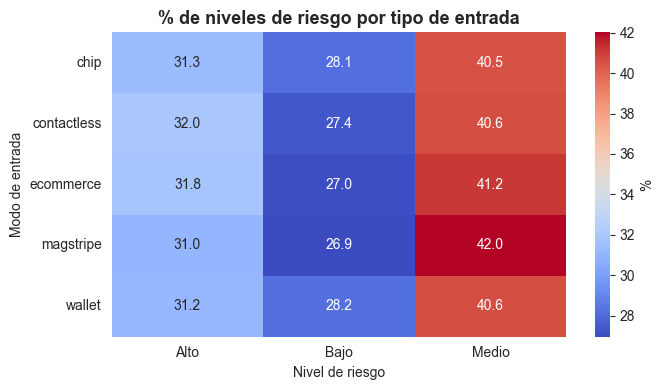

In [708]:
plt.figure(figsize=(7,4))
sns.heatmap(tabla_entry_risk, annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'label': '%'})
plt.title('% de niveles de riesgo por tipo de entrada', fontsize=13, weight='bold')
plt.xlabel('Nivel de riesgo')
plt.ylabel('Modo de entrada')
plt.tight_layout()


# Guardar
plt.savefig(OUT_DIR / "entrymode_risklevel.png", dpi=150, bbox_inches="tight")
plt.show()

## Prevalencia y volumen juntos

In [709]:
resumen_entry = (
    df.groupby('entry_mode')
      .agg(
          operaciones=('entry_mode', 'size'),
          fraude_pct=('is_fraud', lambda s: s.mean()*100)
      )
      .sort_values('fraude_pct', ascending=False)
      .round({'fraude_pct': 2})
)
resumen_entry


,operaciones,fraude_pct
entry_mode,,
wallet,7998,1.28
magstripe,7806,1.15
contactless,8040,1.12
ecommerce,7968,0.98
chip,8094,0.96


## 🔍 Análisis del porcentaje de operaciones fraudulentas por modo de entrada

El análisis del **modo de entrada (`entry_mode`)** permite identificar cómo varía la incidencia del fraude según el canal o tecnología utilizada en las transacciones. Los resultados muestran diferencias sutiles, pero relevantes, entre los distintos métodos.

### 📊 Interpretación general

| Modo de entrada | % total de operaciones | % de fraude |
|-----------------|-----------------------:|-------------:|
| Wallet          | 20.0 %                | **1.28 %** |
| Magstripe       | 19.6 %                | 1.15 % |
| Contactless     | 20.1 %                | 1.12 % |
| Ecommerce       | 20.0 %                | 0.98 % |
| Chip            | 20.3 %                | **0.96 %** |

- **`wallet`** concentra la **mayor tasa de fraude (1.28 %)**, lo que sugiere una vulnerabilidad más alta en operaciones asociadas a billeteras digitales o entornos donde se tokeniza la información.  
- **`magstripe`** (banda magnética) mantiene también una **tasa elevada (1.15 %)**, coherente con su menor nivel de seguridad y uso en comercios más antiguos.  
- **`contactless`** muestra un nivel intermedio (1.12 %), probablemente vinculado a la rapidez del proceso y la ausencia de verificación adicional en transacciones de bajo importe.  
- **`ecommerce`** presenta una **tasa de fraude inferior (0.98 %)**, posiblemente debido a mejores mecanismos de control (autenticación reforzada, 3-D Secure, etc.).  
- **`chip`** es el **modo más seguro (0.96 %)**, reflejando la efectividad del estándar EMV y su validación física de tarjeta.  

---

### 🧠 Relación entre uso y riesgo

El análisis conjunto de frecuencia y fraude revela que los canales **más utilizados no son necesariamente los más riesgosos**.  
Aunque `chip` y `contactless` son los medios más empleados, **wallet** sobresale por su mayor vulnerabilidad, pese a tener una participación similar en volumen.  
Esto refuerza la necesidad de aplicar **controles adicionales en entornos digitales**, especialmente en los métodos de pago alternativos y tokenizados.

---

### 🔥 Distribución del nivel de riesgo por tipo de entrada

El mapa de calor muestra una **mayor concentración de niveles de riesgo medio y alto** en los modos *magstripe* y *wallet*, alcanzando valores cercanos al **42 % de operaciones con riesgo medio**.  
Estos resultados apuntan a la conveniencia de:

- **Priorizar monitorización adicional** sobre operaciones *wallet* y *magstripe*.  
- **Aplicar reglas antifraude dinámicas** que ponderen el riesgo según el modo de entrada.  
- **Revisar umbrales de autorización y scoring** para canales digitales con tendencia al alza en fraude.

---

### 🧾 Conclusión

> El fraude no depende únicamente del volumen de operaciones, sino de la **vulnerabilidad inherente de cada canal de pago**.  
> Los resultados destacan que **wallet y magstripe** son los modos con **mayor exposición al fraude**, mientras que **chip** mantiene el perfil más seguro.  
> Este patrón respalda la hipótesis de que el **riesgo operativo aumenta a medida que disminuye la autenticación física**, siendo los entornos digitales los más propensos a intentos fraudulentos.


# 10. Análisis por tipo de tarjeta 

## Distribución general del tipo de tarjeta y su relación con fraude

In [710]:
df['card_type'].value_counts(normalize=True).mul(100).round(2)


card_type
VISA         50.34
MASTERCARD   29.63
DISCOVER     10.22
AMEX          9.80
Name: proportion, dtype: float64

Más de la mitad de las operaciones se realizan con **VISA (50.34%)**, seguida por **Mastercard (29.63%)**, mientras que **Discover (10.22%)** y **Amex (9.80%)** representan una proporción menor.  
Esto refleja un **mercado concentrado en las dos principales marcas internacionales**, con un volumen secundario en tarjetas menos extendidas.

## Porcentaje de fraude por tipo de tarjeta

In [711]:
fraude_por_tarjeta = (
    df.groupby('card_type')['is_fraud']
      .mean()
      .mul(100)
      .round(2)
      .rename('% fraude')
      .sort_values(ascending=False)
)
fraude_por_tarjeta


card_type
AMEX         1.38
MASTERCARD   1.32
DISCOVER     1.18
VISA         0.90
Name: % fraude, dtype: float64

El fraude no se distribuye de manera proporcional al volumen de operaciones.  
Aunque **VISA** concentra la mitad de las transacciones, presenta la **menor tasa de fraude (0.90%)**, lo que podría asociarse a **controles más robustos y un ecosistema de validación más maduro**.  

Por el contrario, **AMEX (1.38%)** y **Mastercard (1.32%)** muestran **tasas de fraude superiores al promedio**, lo que sugiere una **mayor exposición en determinados tipos de operación o canales**, posiblemente en transacciones online o de mayor importe.


## Gráfico de barras comparativo

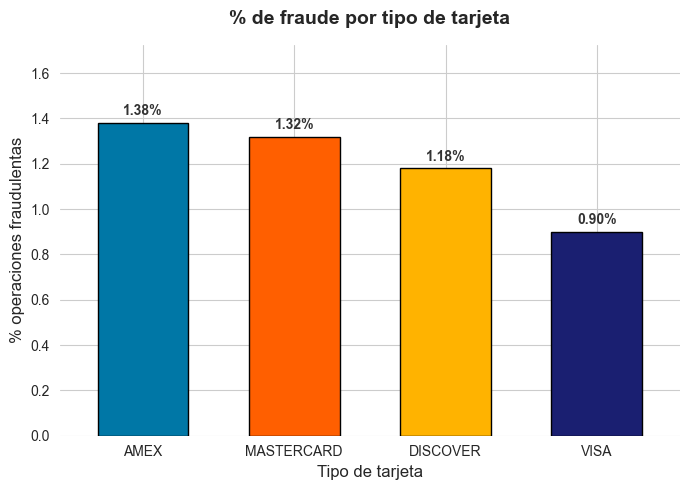

In [712]:
# Estilo visual moderno
sns.set_style("whitegrid")

# Paleta personalizada (colores asociados a cada marca de tarjeta)
colores_tarjetas = {
    'AMEX': '#0077A6',        # azul elegante
    'MASTERCARD': '#FF5F00',  # naranja
    'DISCOVER': '#FFB300',    # dorado
    'VISA': '#1A1F71'         # azul oscuro
}

# Crear gráfico
fig, ax = plt.subplots(figsize=(7,5))
fraude_por_tarjeta.plot(kind='bar', color=[colores_tarjetas[t] for t in fraude_por_tarjeta.index],
                        ax=ax, width=0.6, edgecolor='black')

# Títulos y etiquetas
ax.set_title("% de fraude por tipo de tarjeta", fontsize=14, weight='bold', pad=15)
ax.set_xlabel("Tipo de tarjeta", fontsize=12)
ax.set_ylabel("% operaciones fraudulentas", fontsize=12)

# Mostrar valores sobre las barras
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%",
                (p.get_x() + p.get_width() / 2, p.get_height() + 0.02),
                ha='center', va='bottom', fontsize=10, weight='bold', color='#333')

# Mejoras visuales
plt.xticks(rotation=0)
ax.set_ylim(0, fraude_por_tarjeta.max() * 1.25)
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Guardar figura en la carpeta de salida
plt.savefig(OUT_DIR / "fraude_por_tipo_tarjeta.png", dpi=150, bbox_inches="tight")

plt.show()

## Relación tipo de tarjeta vs nivel de riesgo

In [713]:
pd.crosstab(df['card_type'], df['risk_level'], normalize='index').mul(100).round(2)


risk_level,Alto,Bajo,Medio
card_type,,,
AMEX,31.60,27.94,40.47
DISCOVER,31.96,26.25,41.79
MASTERCARD,30.82,27.89,41.29
VISA,31.72,27.51,40.77


Los resultados muestran que **todas las tarjetas mantienen una distribución de riesgo bastante homogénea**, con predominio del **riesgo medio (40–42%)**.  
Sin embargo, **Discover** y **Amex** presentan una **ligera inclinación hacia niveles de riesgo medio-alto**, lo que podría explicar su mayor tasa de fraude observada en el gráfico anterior.

## Relación entre tipo de comercio y tipo de tarjeta

## Distribución general cruzada

In [714]:
tabla_comercio_tarjeta = pd.crosstab(df['merchant_category'], df['card_type'])
tabla_comercio_tarjeta


card_type,AMEX,DISCOVER,MASTERCARD,VISA
merchant_category,,,,
electronics,534,600,1716,2772
fashion,660,624,1782,2838
gaming,582,504,1740,2982
grocery,438,630,1566,2724
pharmacy,462,558,1530,2934
restaurant,648,600,1776,3078
travel,588,564,1716,2760


## Versión normalizada por filas (% dentro de cada tipo de comercio)

In [715]:
tabla_comercio_tarjeta_pct = (
    pd.crosstab(df['merchant_category'], df['card_type'], normalize='index')
      .mul(100)
      .round(2)
)
tabla_comercio_tarjeta_pct


card_type,AMEX,DISCOVER,MASTERCARD,VISA
merchant_category,,,,
electronics,9.50,10.67,30.52,49.31
fashion,11.18,10.57,30.18,48.07
gaming,10.02,8.68,29.96,51.34
grocery,8.17,11.76,29.23,50.84
pharmacy,8.42,10.18,27.90,53.50
restaurant,10.62,9.83,29.11,50.44
travel,10.45,10.02,30.49,49.04


Los resultados muestran una clara **predominancia de las tarjetas VISA y Mastercard** en prácticamente todos los tipos de comercio.  
En todos los sectores analizados, **VISA supera el 45 % del total de operaciones**, seguida de **Mastercard**, mientras que **AMEX** y **Discover** mantienen volúmenes menores (en torno al 8–11 % cada una).  
Esto indica un **patrón de uso consolidado** y coherente con la estructura habitual del mercado financiero.



## Porcentaje operaciones por tipo de tarjeta y comercio

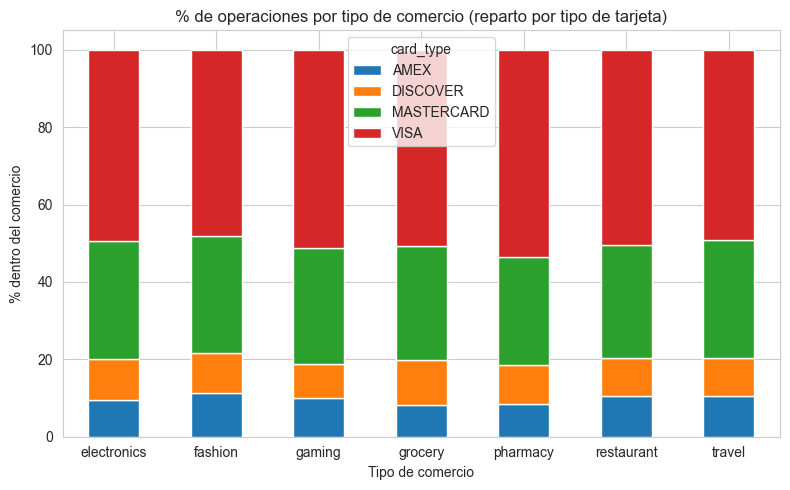

In [716]:
# Aseguramos porcentajes por fila (debería estarlo ya)
tabla_pct = tabla_comercio_tarjeta_pct.copy()  # filas = merchant_category, cols = card_type, suman 100

ax = tabla_pct.plot(kind='bar', stacked=True, figsize=(8,5))
ax.set_title('% de operaciones por tipo de comercio (reparto por tipo de tarjeta)')
ax.set_xlabel('Tipo de comercio')
ax.set_ylabel('% dentro del comercio')
plt.xticks(rotation=0)
plt.tight_layout()

# Guardar
plt.savefig(OUT_DIR / "operaciones_tipo_tarjeta_comercio.png", dpi=150, bbox_inches="tight")
plt.show()

La versión porcentual confirma que **VISA representa entre el 48 % y el 53 % de las operaciones** en todos los sectores.  
En segundo lugar se encuentra **MASTERCARD (27–31 %)**, mientras que **AMEX y DISCOVER** comparten el rango restante, con proporciones entre el 8 % y el 11 %.

La **categoría pharmacy** destaca con el mayor porcentaje de uso de **VISA (53.5 %)**, lo que podría estar relacionado con la **frecuencia alta y el importe bajo** de las operaciones, mientras que **fashion y travel** muestran una **mayor presencia relativa de AMEX**, coherente con **compras de mayor valor** o **viajes**, donde se tiende a usar crédito premium.


# 11. Análisis por resultado de la transacción

## Porcentaje de fraude por tipo de resultado

In [717]:
fraude_por_resultado = (
    df.groupby('transaction_result')['is_fraud']
      .mean()
      .mul(100)
      .round(2)
      .rename('% fraude')
      .sort_values(ascending=False)
)
fraude_por_resultado


transaction_result
declined   2.07
pending    1.28
approved   1.01
Name: % fraude, dtype: float64

Los resultados muestran que las **transacciones rechazadas (declined)** presentan la **mayor proporción de fraude (2.07%)**, seguidas por las **pendientes (1.28%)** y, finalmente, las **aprobadas (1.01%)**.

Esta distribución es coherente con un **sistema de control antifraude eficaz**, ya que la mayor concentración de fraude aparece en las operaciones **que no llegaron a completarse**.  
En otras palabras, los mecanismos de filtrado —reglas, validaciones o scoring de riesgo— están **identificando y bloqueando correctamente** gran parte de los intentos sospechosos antes de que se materialicen en fraude consumado.


## Gráfico de barras

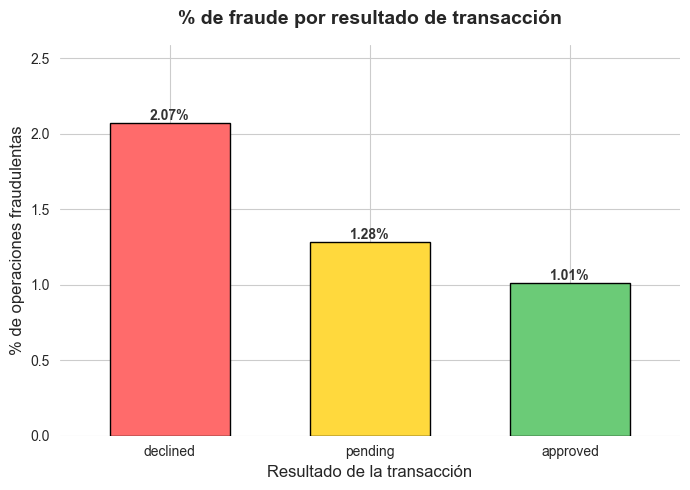

In [718]:
# Estilo visual moderno
sns.set_style("whitegrid")

# Crear figura y gráfico
fig, ax = plt.subplots(figsize=(7,5))
colors = ["#FF6B6B", "#FFD93D", "#6BCB77"]  # rojo, amarillo, verde

fraude_por_resultado.plot(kind='bar', color=colors, ax=ax, width=0.6, edgecolor='black')

# Título y etiquetas
ax.set_title("% de fraude por resultado de transacción", fontsize=14, weight='bold', pad=15)
ax.set_xlabel("Resultado de la transacción", fontsize=12)
ax.set_ylabel("% de operaciones fraudulentas", fontsize=12)

# Etiquetas de porcentaje sobre las barras
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, weight='bold', color='#333333')

# Mejoras visuales
ax.set_ylim(0, fraude_por_resultado.max() * 1.25)  # deja espacio arriba
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)
plt.tight_layout()


# Guardar figura
plt.savefig(OUT_DIR / "fraude_por_resultado_transaccion.png", dpi=150, bbox_inches="tight")
plt.show()